<a href="https://colab.research.google.com/github/febrahim-driod/hello-world/blob/master/notebook/Yolov8_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

Pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/requirements.txt) and check software and hardware.

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()
!pip install roboflow --quiet
!pip install clearml --quiet

Ultralytics YOLOv8.0.75 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


In [ ]:
import os
from IPython.display import Image, display
import glob
from clearml import Task

HOME = os.getcwd()
print(HOME)

/content


In [ ]:
#model_type='detection'
#model_type='body_parts'
#model_type='severity'
#model_type='damage_type'
model_type='logo_detection'
WEIGHTS_PATH = f"{HOME}/yolov8l-seg.pt"
TASK='segment'
IMGSZ=640
BATCH_SIZE=16
WORKERS=8
PATIENCE=10

#roboflow
#workspace="sinfo"
#workspace="fizzy"
workspace="ae-43fv6"

if model_type=="detection":
   EPOCH=30
   PROJECT_NAME="yolov8_damage_detection"
   RUN_NAME="train_seg_"+str(EPOCH)+"_epoch"
elif model_type=="body_parts":
   EPOCH=100
   PROJECT_NAME="yolov8_body_parts"
   RUN_NAME="train_seg_"+str(EPOCH)+"_epoch"
elif model_type=="severity":
   EPOCH=100
   PROJECT_NAME="yolov8_severity"
   RUN_NAME="train_seg_"+str(EPOCH)+"_epoch"
elif model_type=="damage_type":
   EPOCH=50
   PROJECT_NAME="yolov8_damage_type"
   RUN_NAME="train_seg_"+str(EPOCH)+"_epoch"
elif model_type=="logo_detection"
   EPOCH=50
   PROJECT_NAME="yolov8_logo_detection"
   RUN_NAME="train_seg_"+str(EPOCH)+"_epoch"

In [ ]:
from roboflow import Roboflow

if workspace=="sinfo":
  apikey="P5E6JhfkeiA1nAdZAWnB" #Github
if workspace=="fizzy":             
  apikey="BY0NkaVcAVgAKtFokphd" #Ayesha Ibrahim
if workspace=="ae-43fv6":
  apikey="4Bp3oYulJzO2eVypsB2l" #Ayesha Ebrahim


rf = Roboflow(api_key=apikey)
if model_type=="detection":
  if workspace=="sinfo":
    project = rf.workspace(workspace).project("car_damage-4xqh8")
    dataset = project.version(6).download("yolov8")
    DATA_FOLDER='car_damage-6'
  DATA_YAML_PATH= f"{HOME}/{DATA_FOLDER}/data.yaml"
elif model_type=="body_parts":
  if workspace=="sinfo":
    project = rf.workspace(workspace).project("car-body-parts-p025a")
    dataset = project.version(5).download("yolov8")
    DATA_FOLDER='car-body-parts-5'
  elif workspace=="ae-43fv6": 
    project = rf.workspace("ae-43fv6").project("body-parts-cq3al")
    dataset = project.version(2).download("yolov8")
    DATA_FOLDER='Body-Parts-2'
  DATA_YAML_PATH= f"{HOME}/{DATA_FOLDER}/data.yaml"
elif model_type=="severity":
  if workspace=="sinfo":
    project = rf.workspace(workspace).project("car-damage-severity")
    dataset = project.version(2).download("yolov8")
    DATA_FOLDER='car-damage-severity-2'
  elif workspace=="ae-43fv6":
    project = rf.workspace(workspace).project("damage-severity")
    dataset = project.version(1).download("yolov8")
    DATA_FOLDER='Damage-Severity-1'
  DATA_YAML_PATH= f"{HOME}/{DATA_FOLDER}/data.yaml"
elif model_type=="damage_type":
  if workspace=="sinfo":
    project = rf.workspace(workspace).project("car-damage-type")
    dataset = project.version(1).download("yolov8")
    DATA_FOLDER='car-damage-type-1'
  elif  workspace=="fizzy":
    project = rf.workspace(workspace).project("damage-type-nbmqw")
    dataset = project.version(3).download("yolov8")
    DATA_FOLDER='Damage-Type-3'
  elif workspace=="ae-43fv6":
    project = rf.workspace(workspace).project("damage-type-nogzj")
    dataset = project.version(4).download("yolov8")
    DATA_FOLDER='Damage-Type-4'
  elif workspace=="ae-43fv6":
    project = rf.workspace(workspace).project("logo-detection-ccqeh")
    dataset = project.version(1).download("yolov8")
    DATA_FOLDER='Logo-Detection-1'
  DATA_YAML_PATH= f"{HOME}/{DATA_FOLDER}/data.yaml"


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.75, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Body-Parts-1 in yolov8:: 100%|██████████| 2460/2460 [00:01<00:00, 1979.10it/s]


In [ ]:


%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
# colob_notebook
%env CLEARML_API_ACCESS_KEY=AMY0O903Z5A7KN5FETFJ
%env CLEARML_API_SECRET_KEY=y7hUwY62xMFWwADGFWzKd33C2b8C4f1AxTDymedak5lQFzmbJg

task = Task.init(project_name=PROJECT_NAME, task_name=RUN_NAME)


env: CLEARML_WEB_HOST=https://app.clear.ml
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=AMY0O903Z5A7KN5FETFJ
env: CLEARML_API_SECRET_KEY=y7hUwY62xMFWwADGFWzKd33C2b8C4f1AxTDymedak5lQFzmbJg
ClearML Task: created new task id=20f48667b65c45e48a2983d528315605
2023-04-13 01:33:32,377 - clearml.Task - INFO - Storing jupyter notebook directly as code


ClearML results page: https://app.clear.ml/projects/f7721afb9008472094d75f5b4d8d4667/experiments/20f48667b65c45e48a2983d528315605/output/log


In [ ]:
# Run inference on an image with YOLOv8n-seg
#!yolo predict model=yolov8l-seg.pt source='https://ultralytics.com/images/zidane.jpg' box=False

# 3. Train

<p align=""><a href="https://roboflow.com/?ref=ultralytics"><img width="1000" src="https://github.com/ultralytics/assets/raw/main/yolov8/banner-integrations.png"/></a></p>



In [ ]:
# Train YOLOv8l on Custom Data
!yolo mode=train \
      model=$WEIGHTS_PATH \
      data=$DATA_YAML_PATH \
      epochs=$EPOCH \
      imgsz=$IMGSZ \
      task=$TASK \
      project=$PROJECT_NAME \
      name=$RUN_NAME \
      batch=$BATCH_SIZE \
      workers=$WORKERS    

Ultralytics YOLOv8.0.75 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=/content/yolov8l-seg.pt, data=/content/Body-Parts-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=yolov8_body_parts, name=train_seg_50_epoch, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False

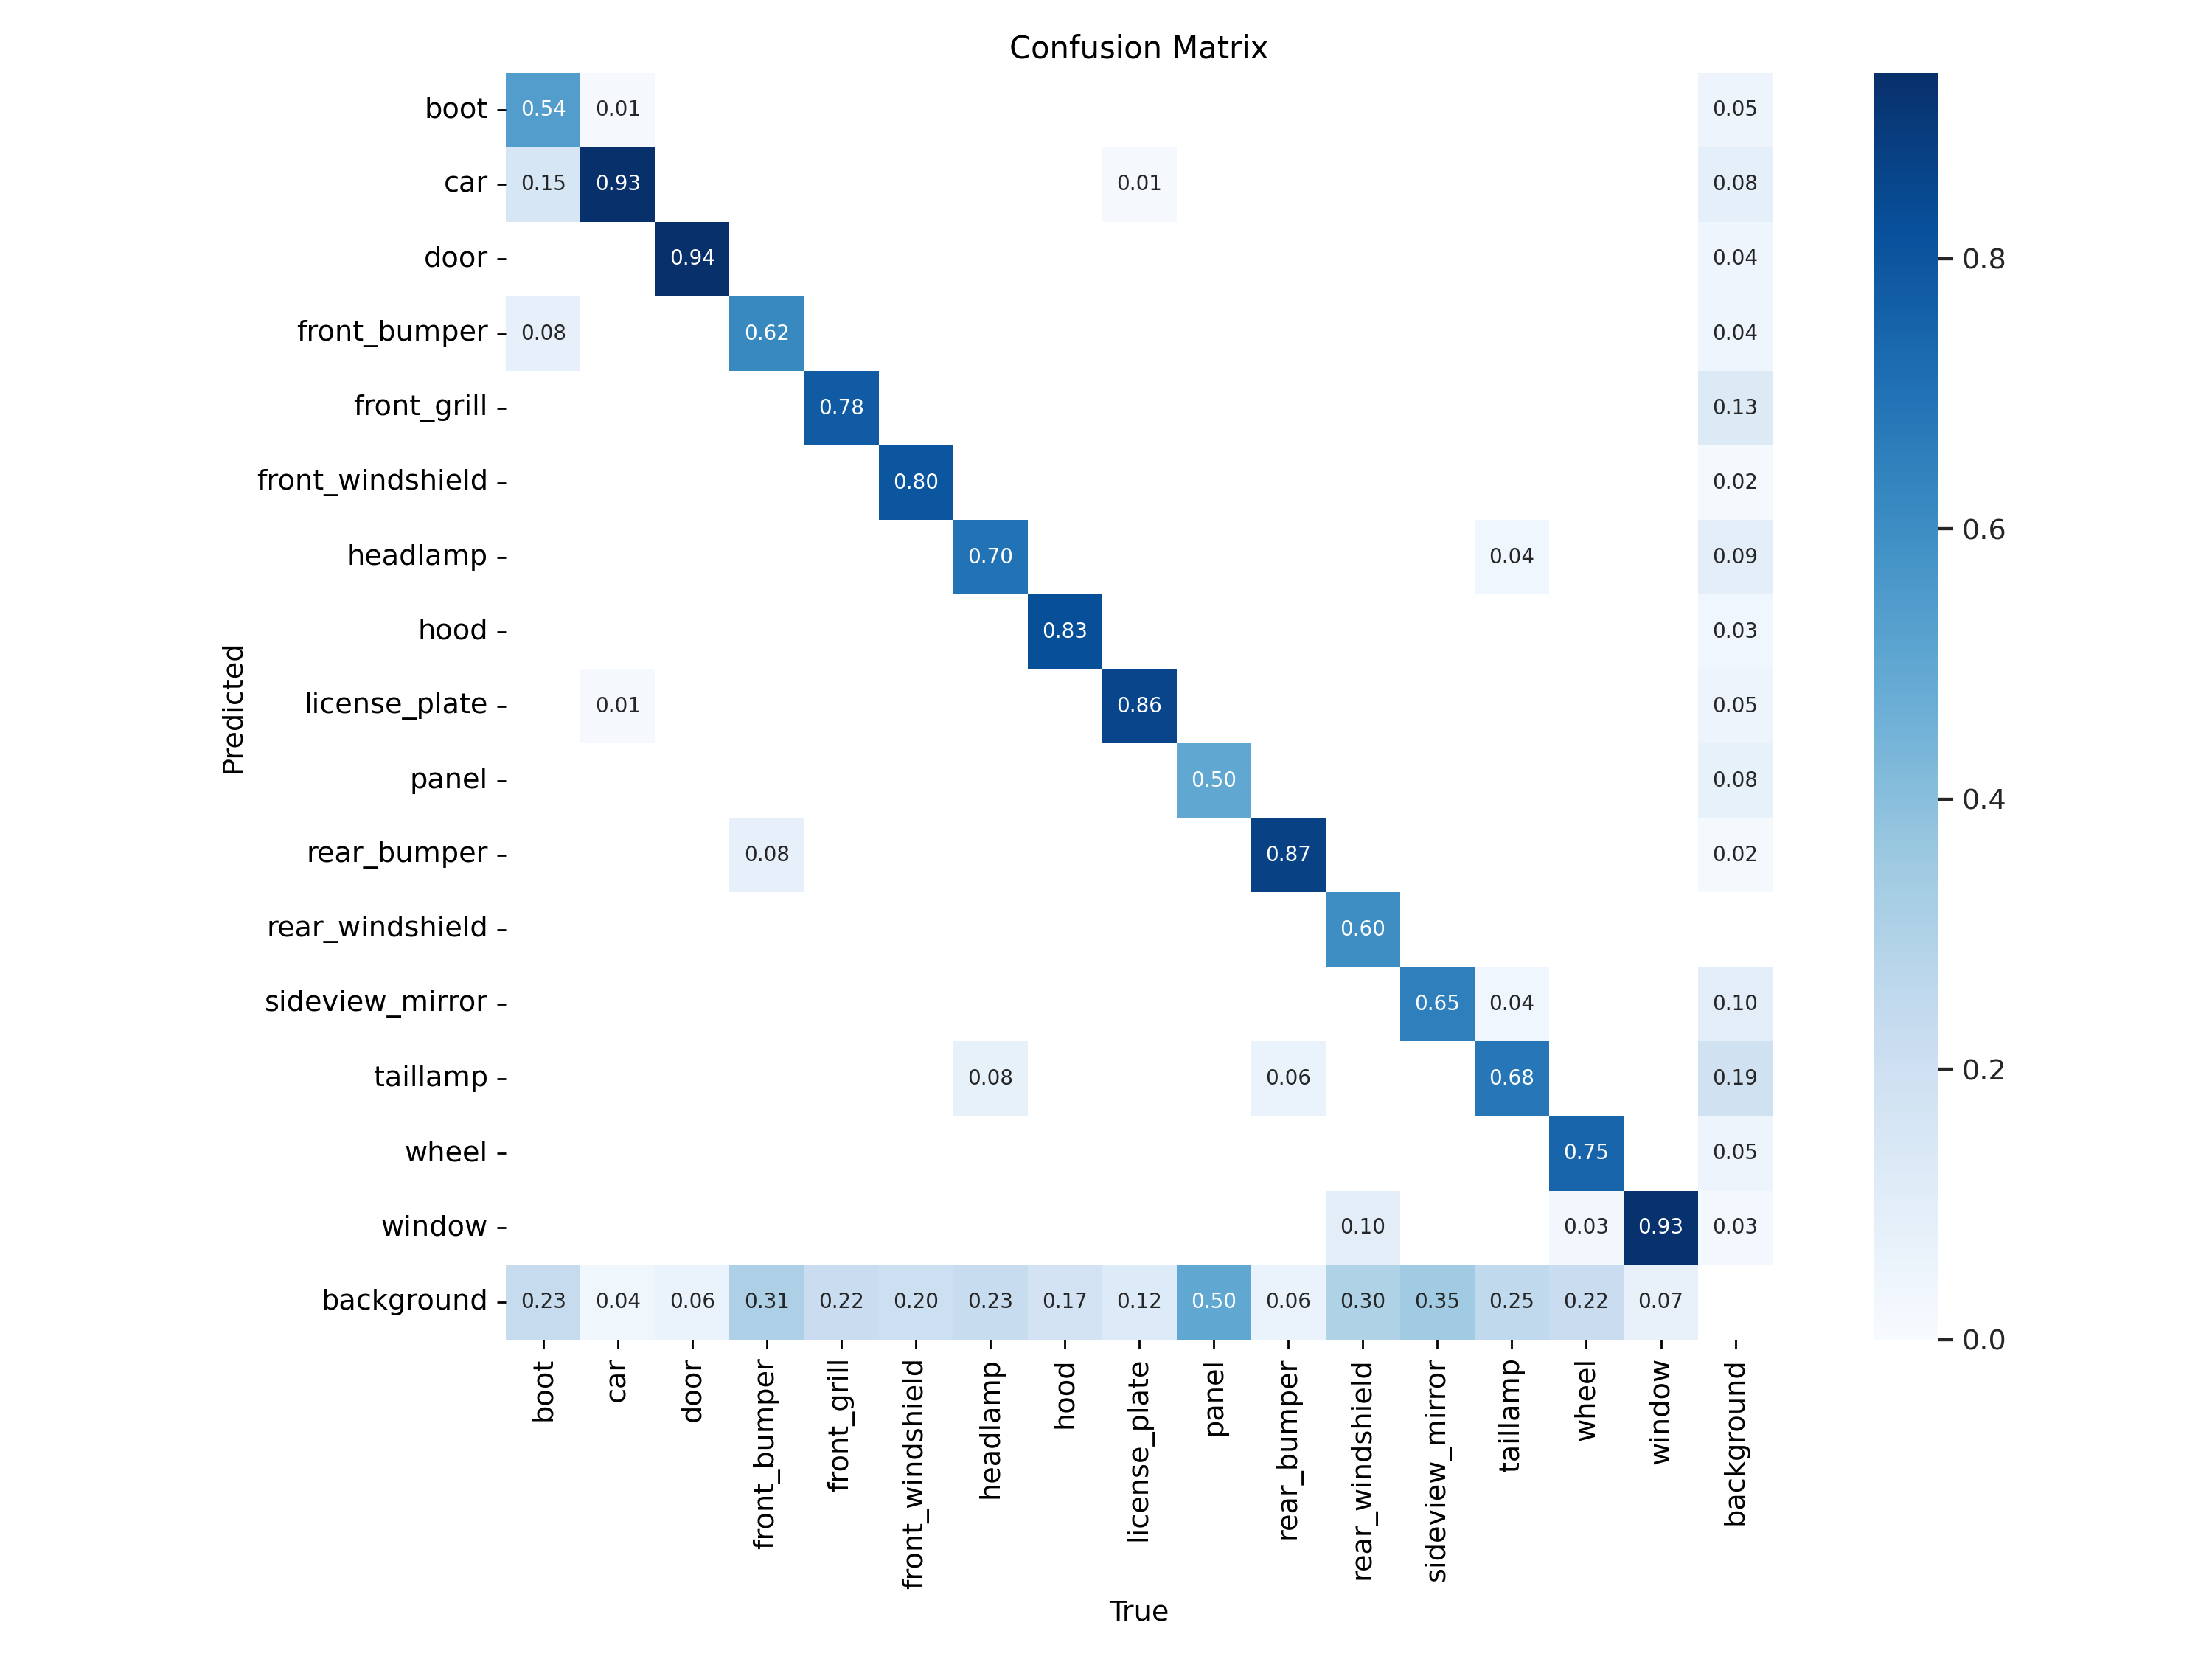

In [ ]:
#confusion matrix
display(Image(filename=f'/content/{PROJECT_NAME}/{RUN_NAME}/confusion_matrix.png'))
print("\n")

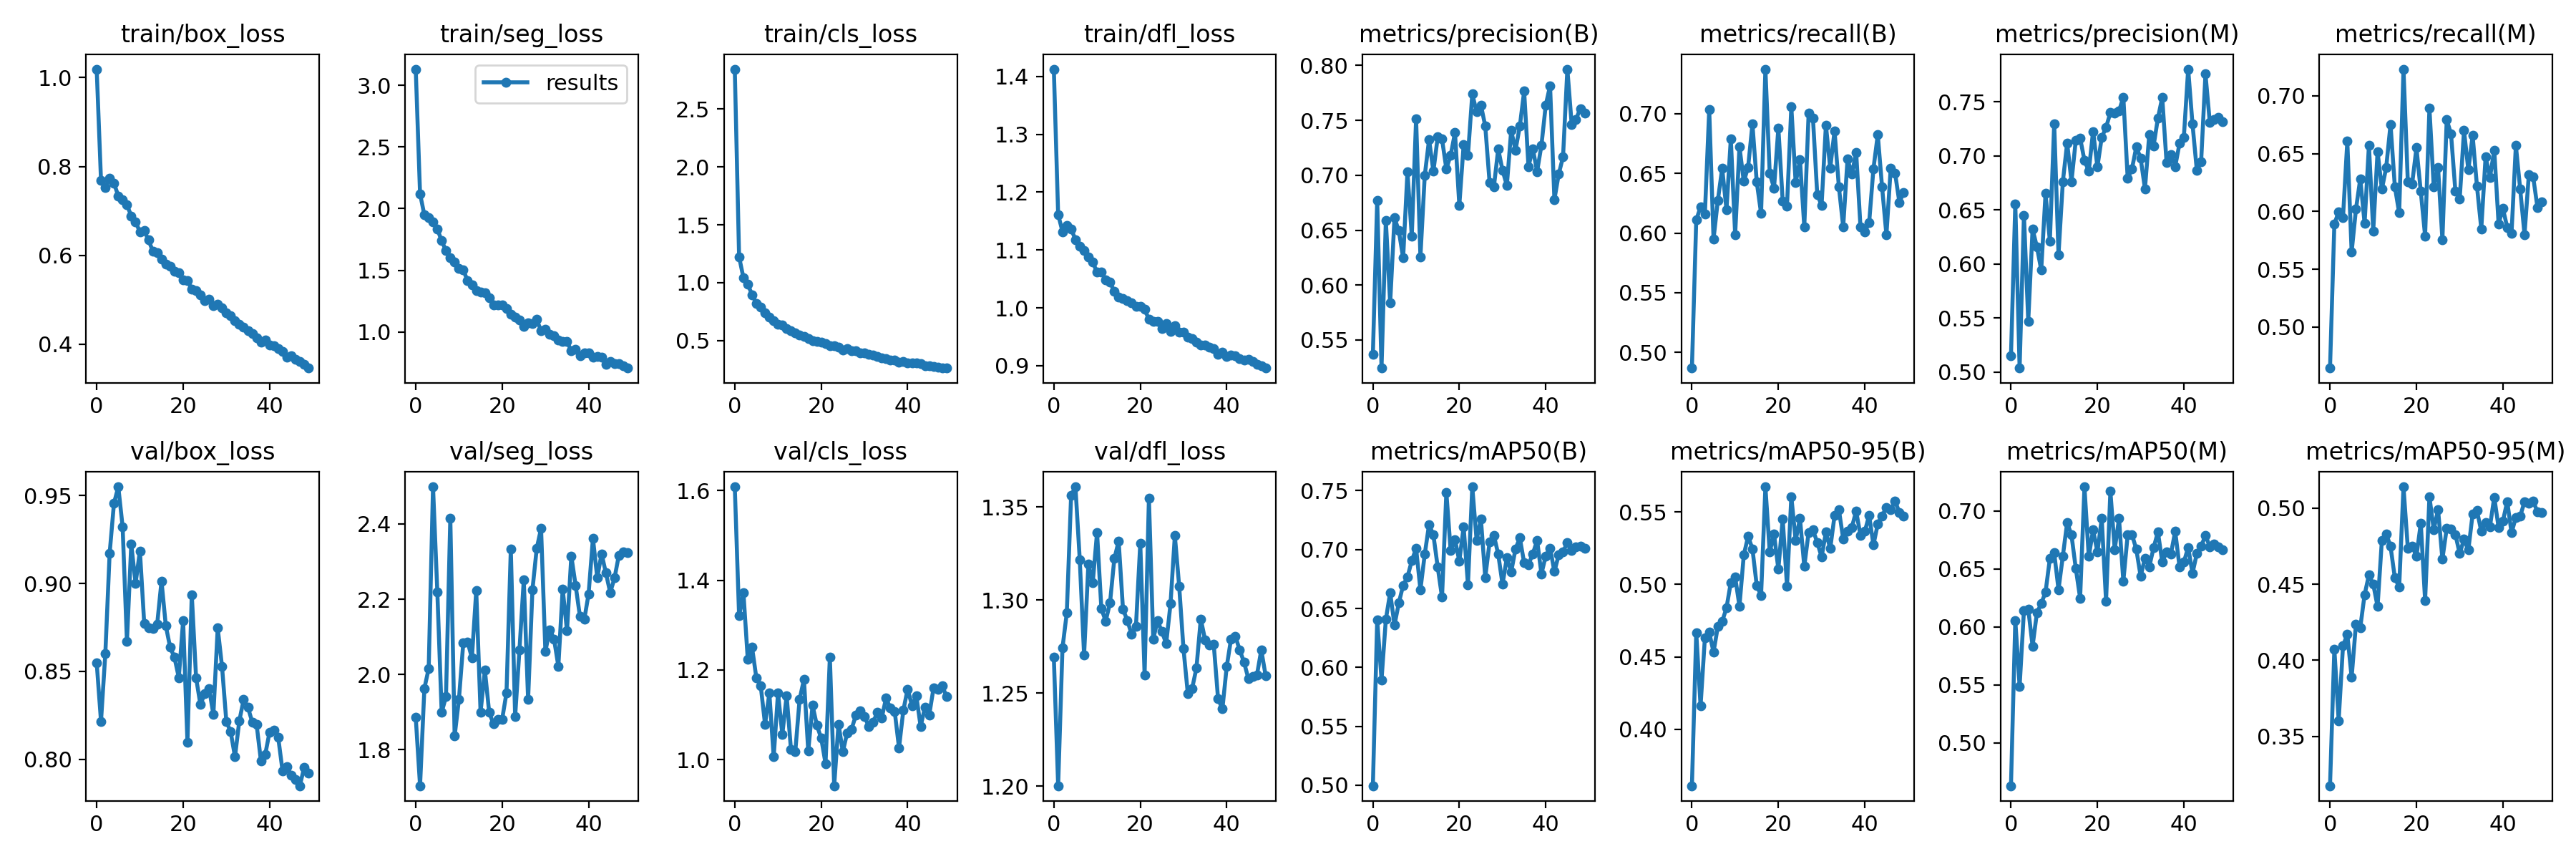

In [ ]:
#training metrics
display(Image(filename=f'/content/{PROJECT_NAME}/{RUN_NAME}/results.png'))
print("\n")

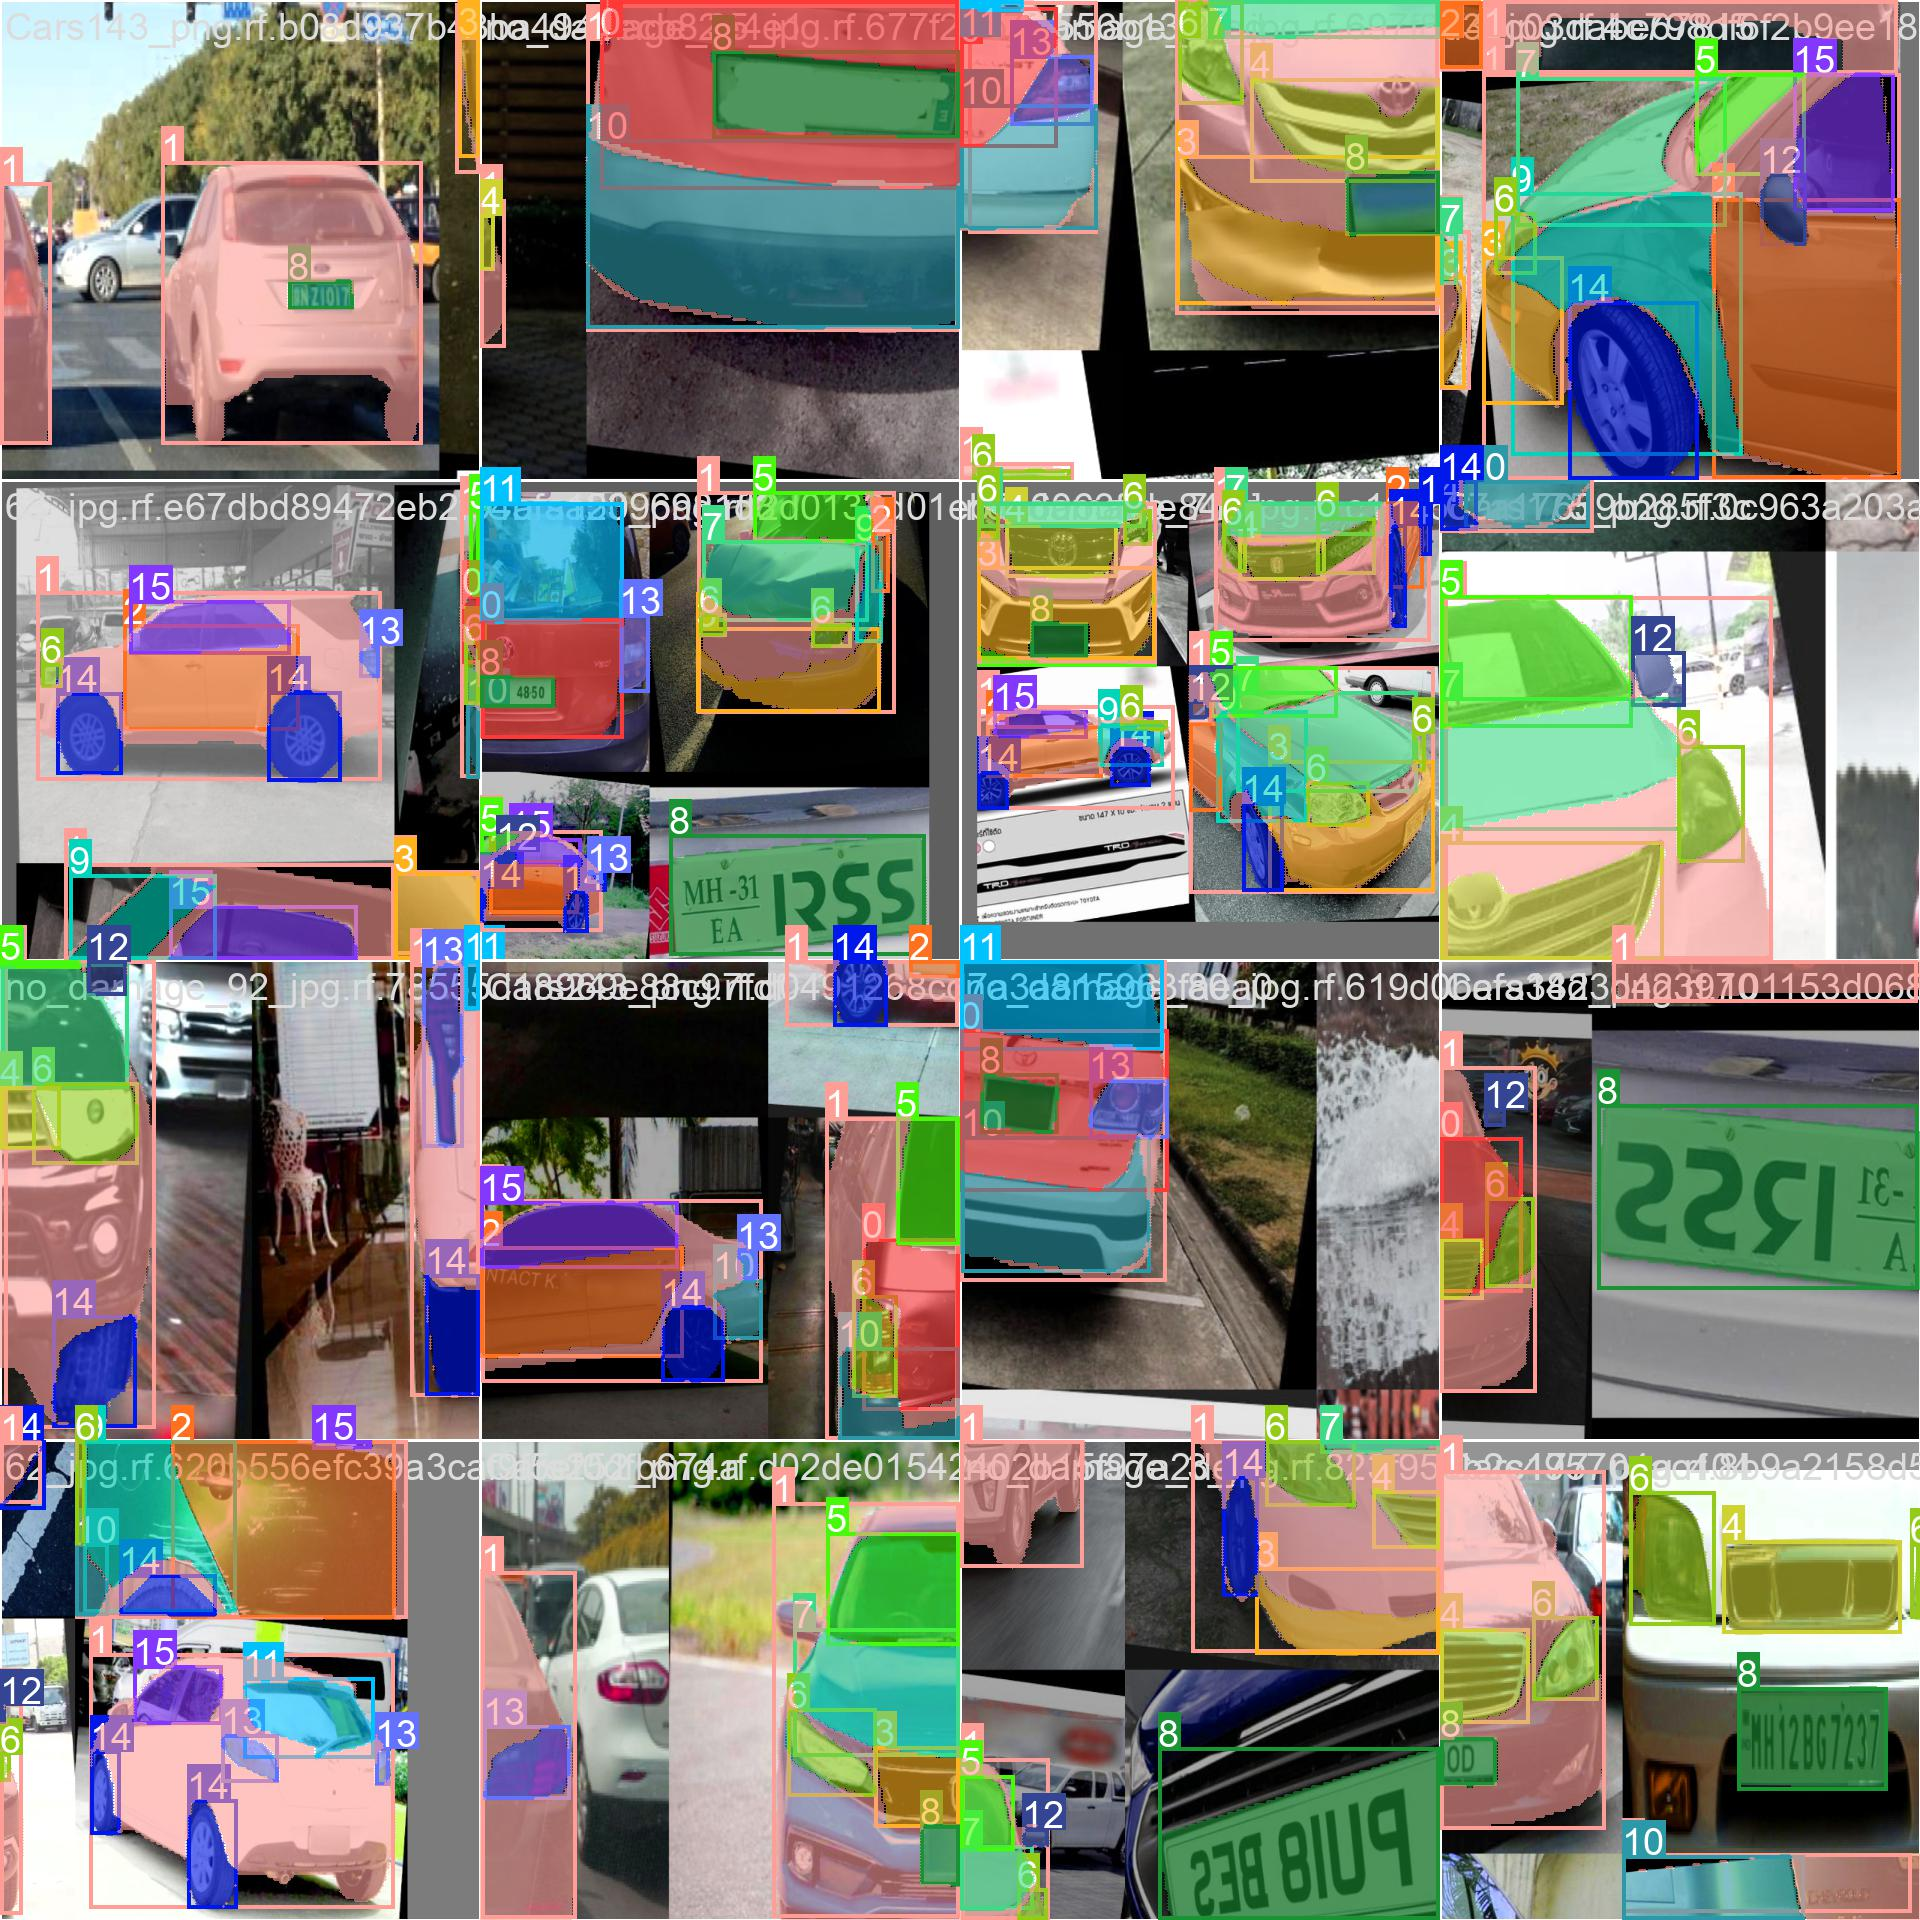

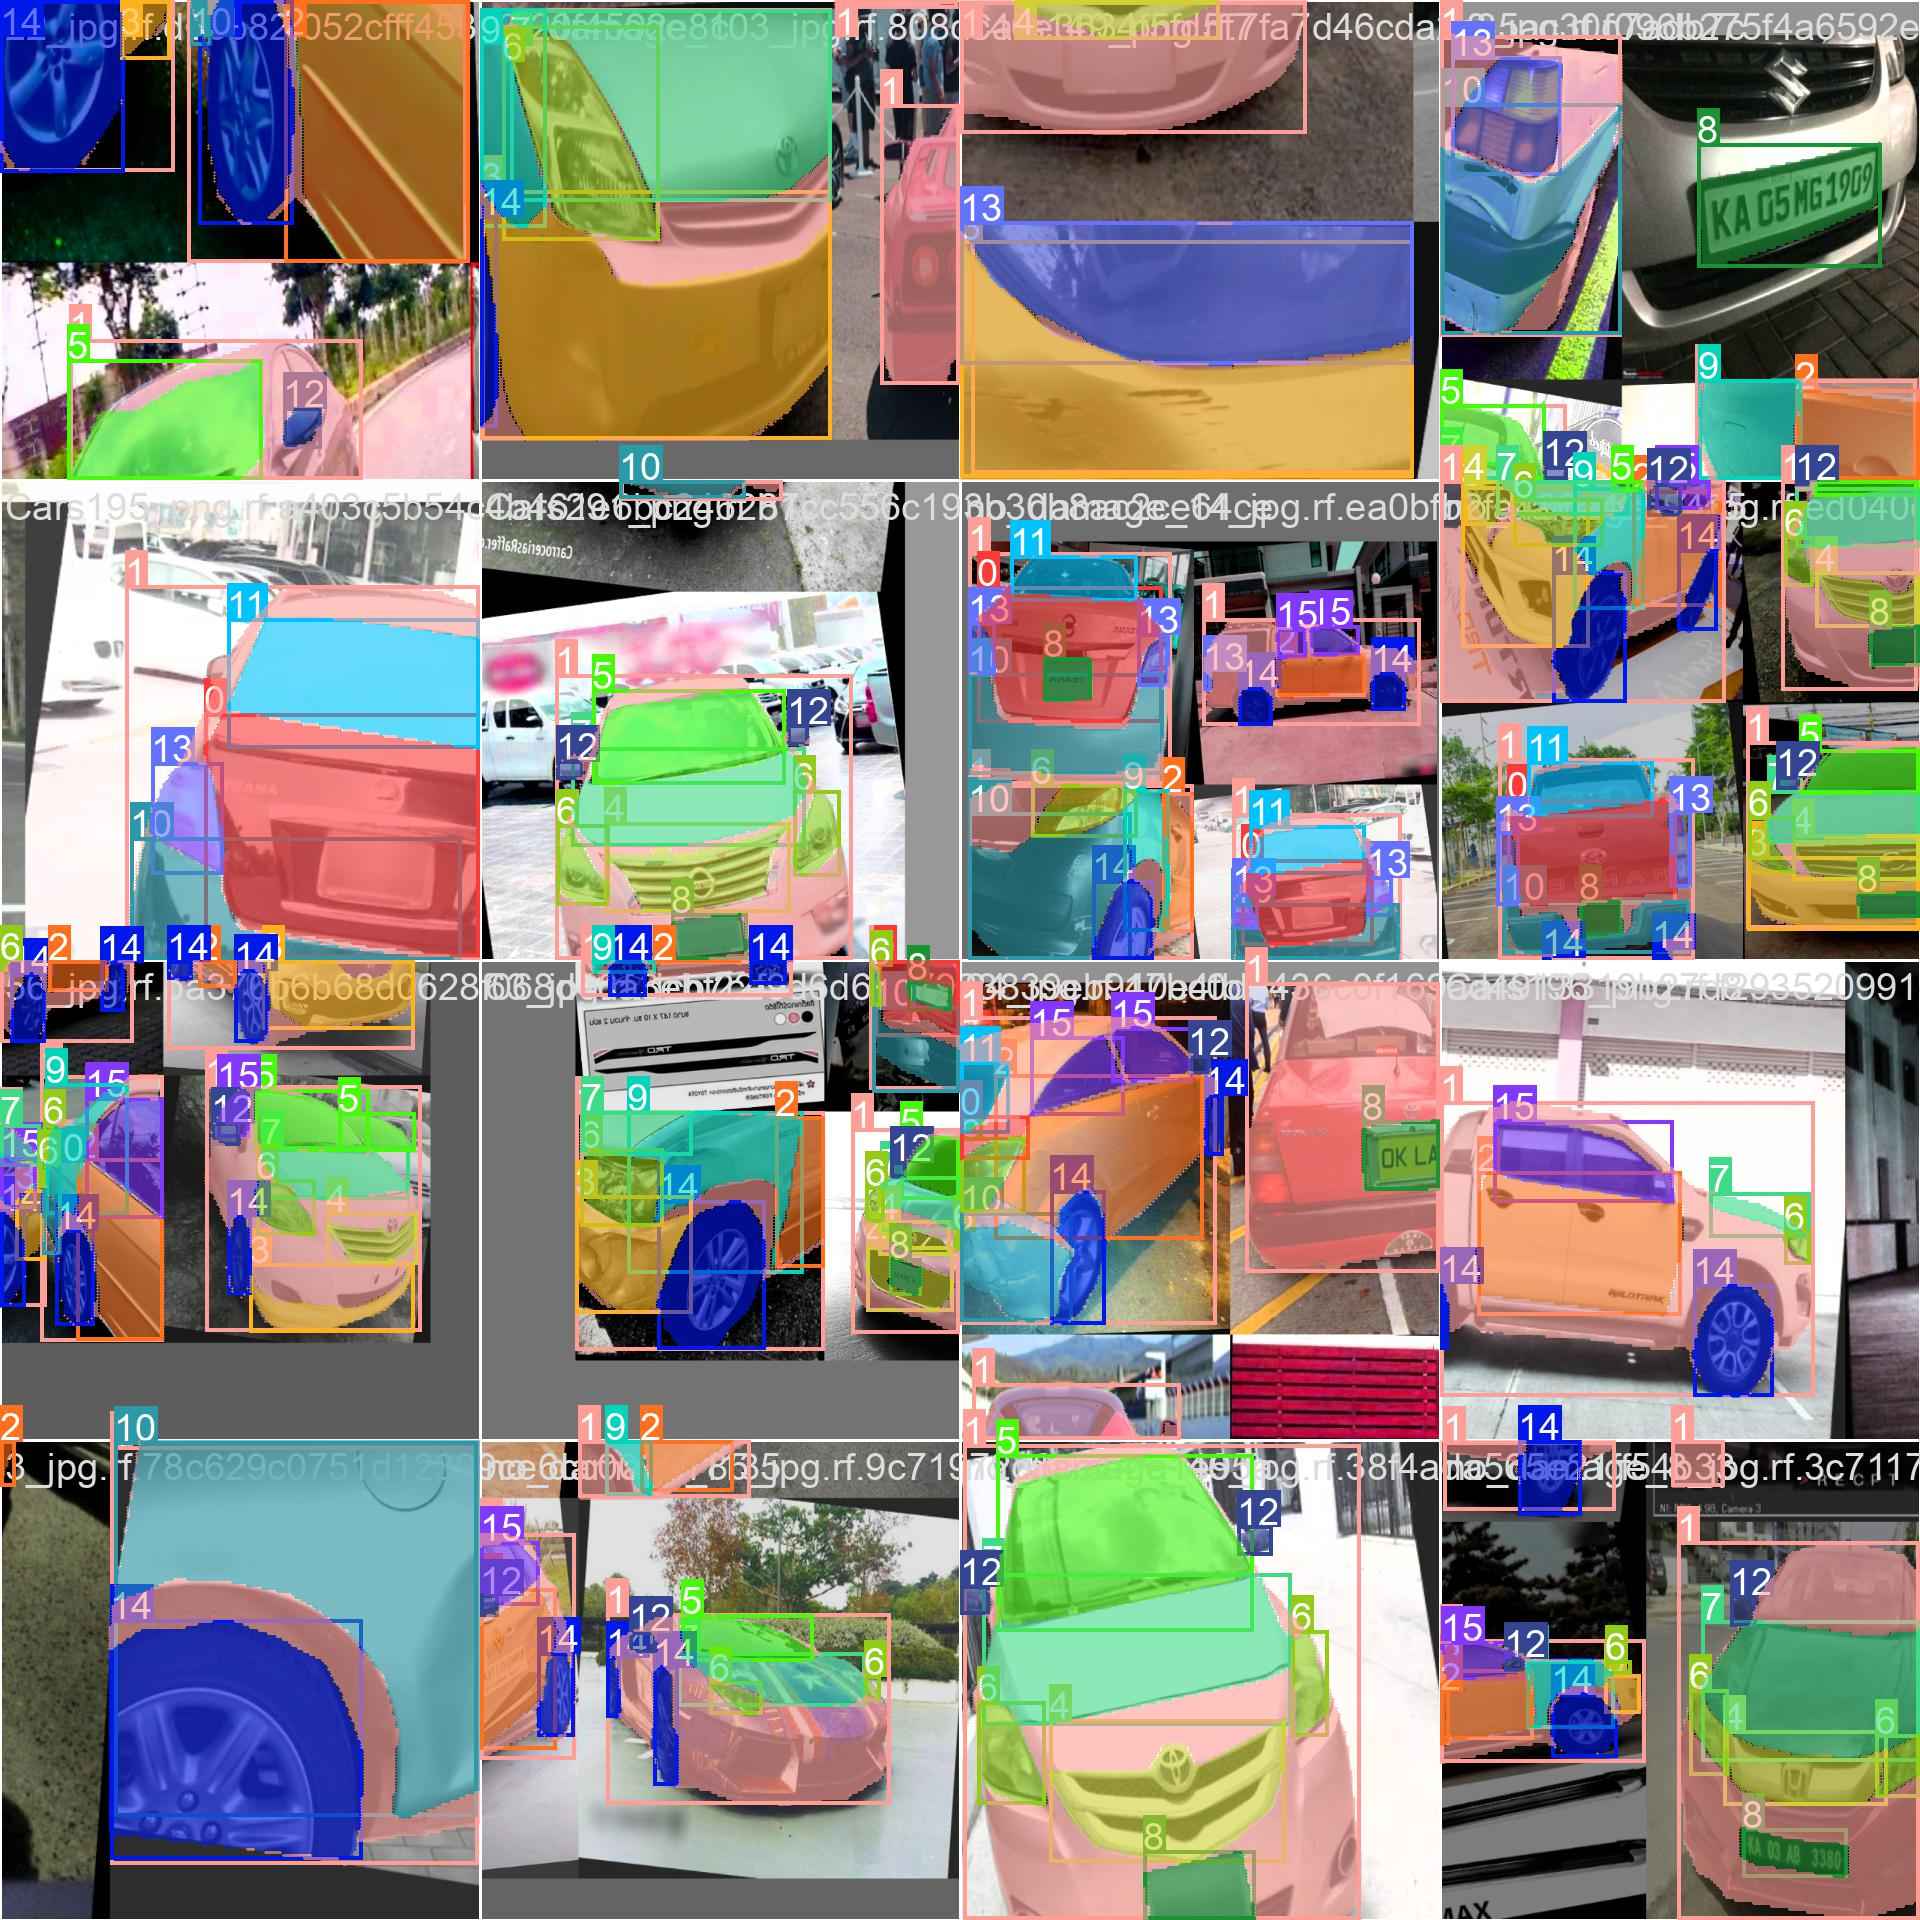

In [ ]:
for imageName in glob.glob(f'/content/{PROJECT_NAME}/{RUN_NAME}/train_*.jpg')[:2]:
      display(Image(filename=imageName))
      print("\n")



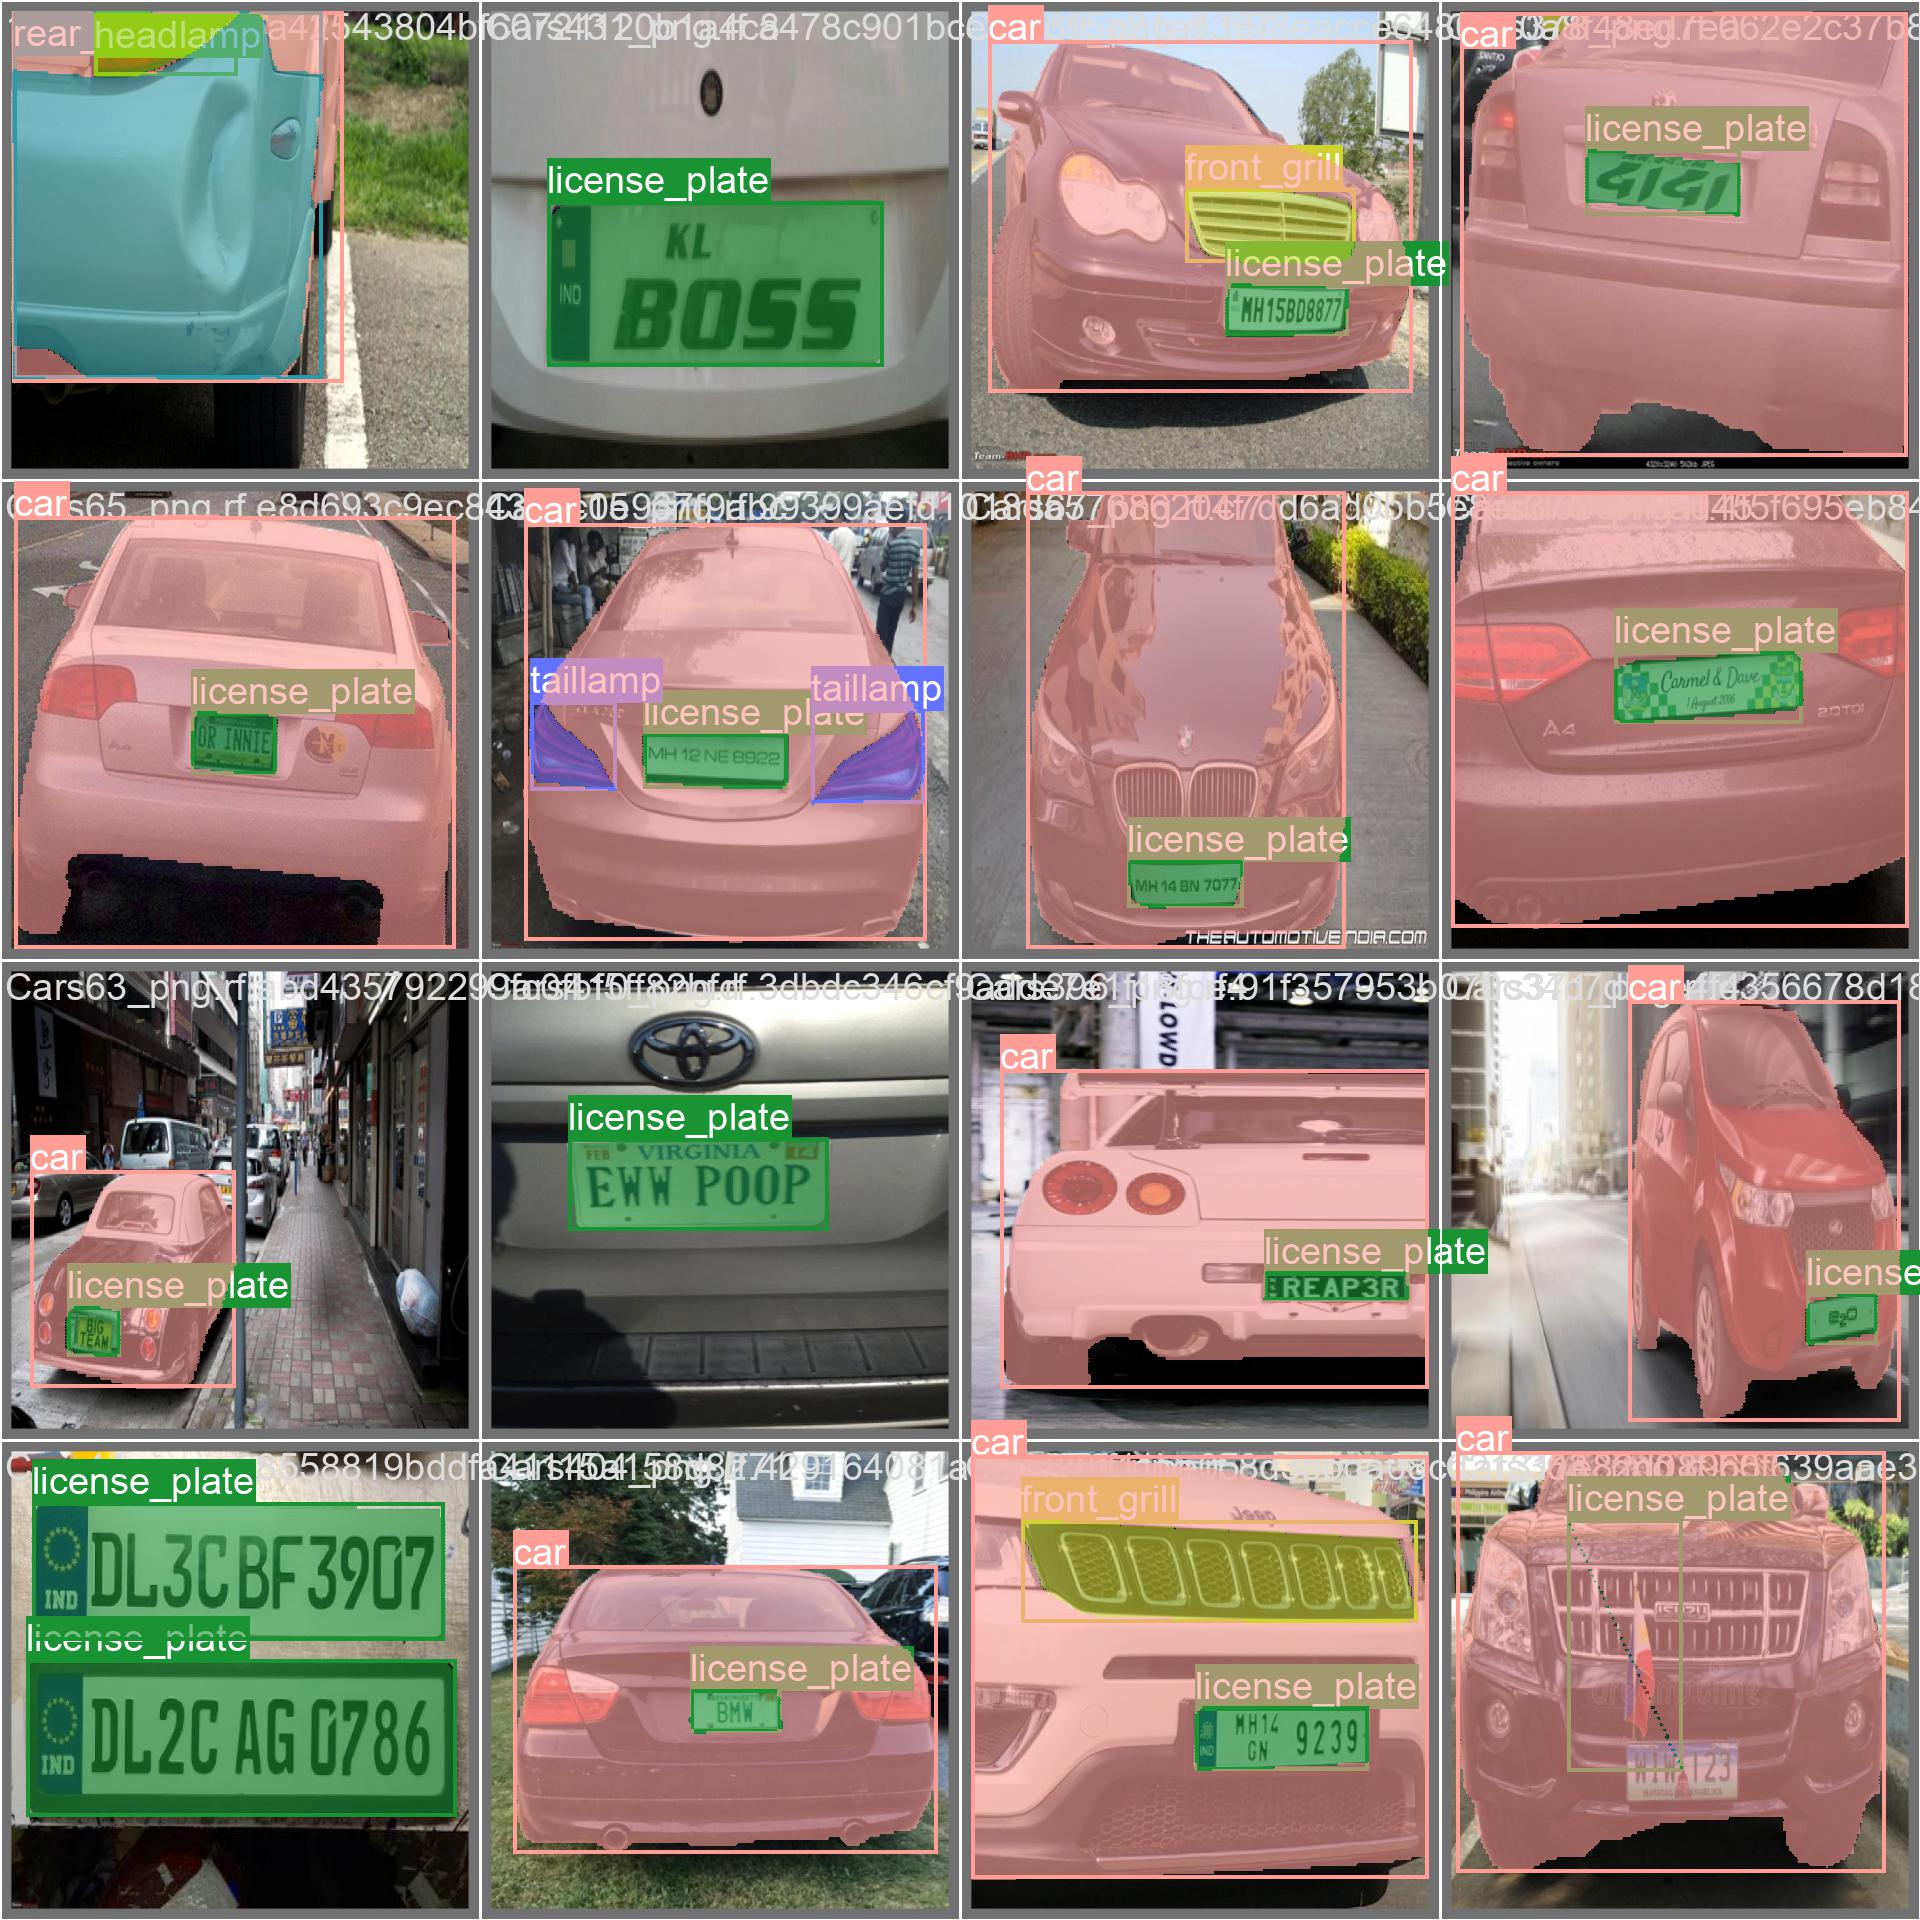

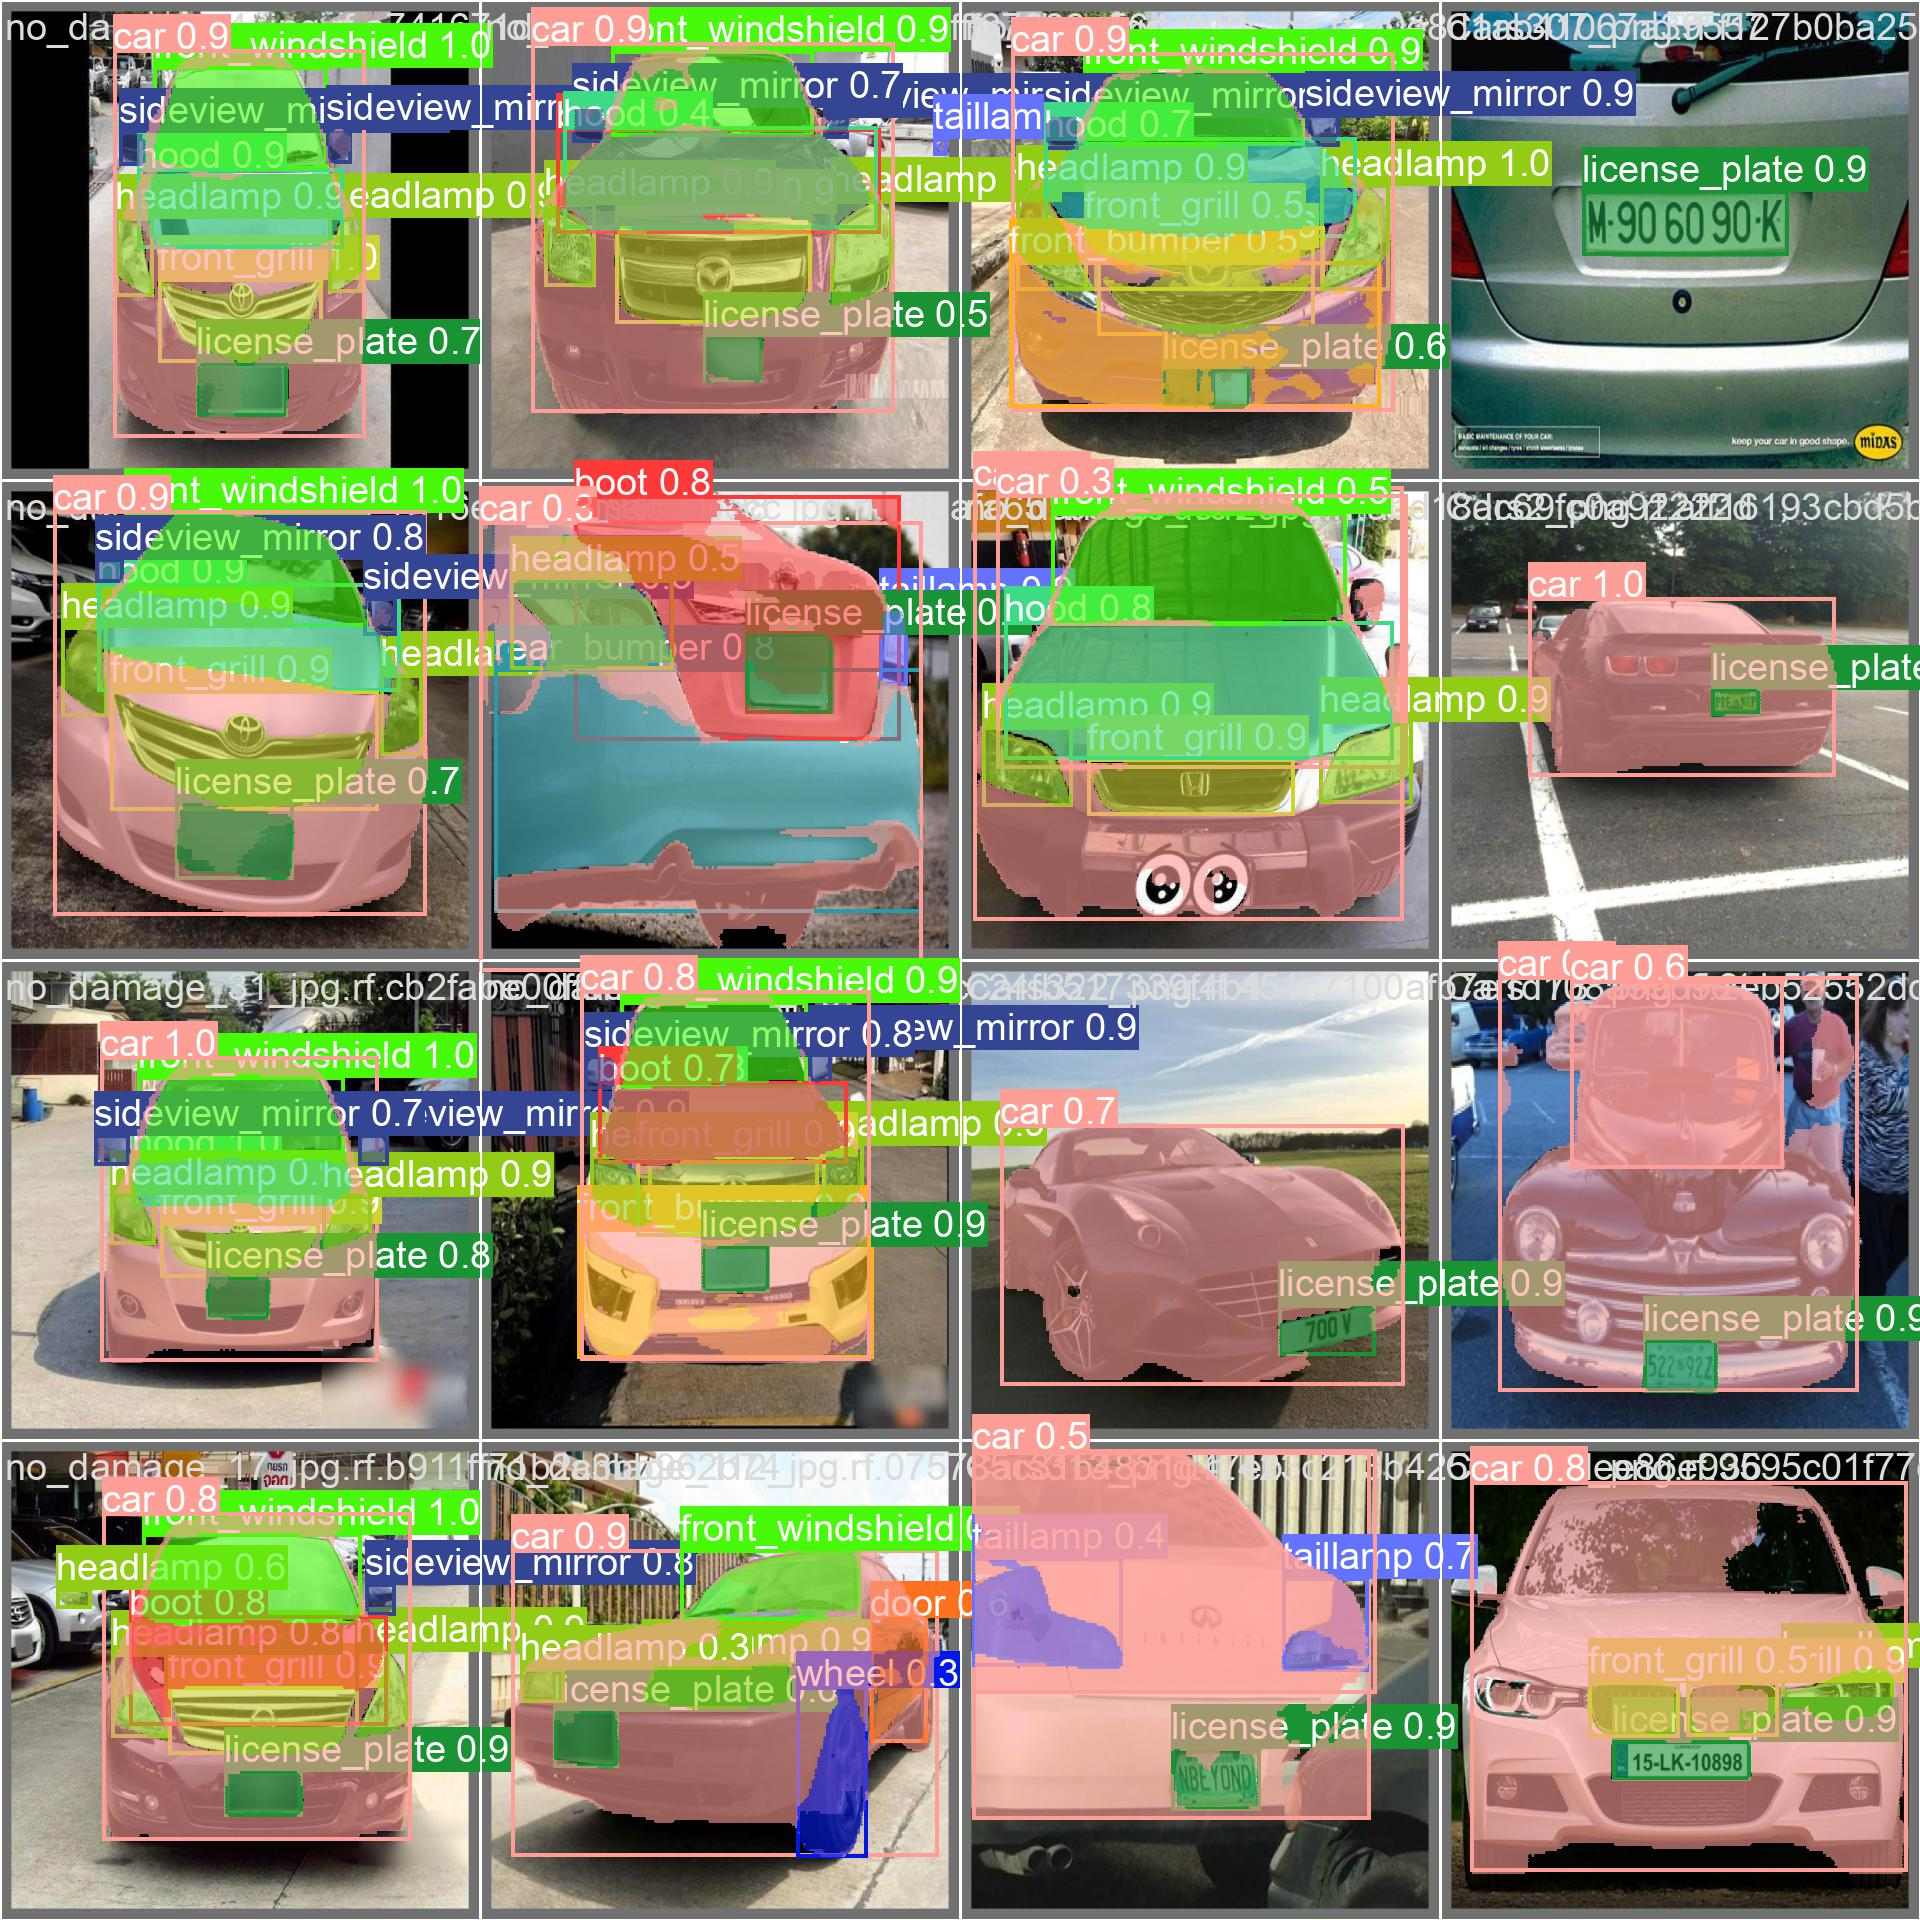

In [ ]:
for imageName in glob.glob(f'/content/{PROJECT_NAME}/{RUN_NAME}/val_*.jpg')[:2]:
      display(Image(filename=imageName))
      print("\n")

# 5. Predict
Predict a model's accuracy on the dataset's `test` splits. 

In [ ]:
BEST_WEIGHTS_PATH=f'/content/{PROJECT_NAME}/{RUN_NAME}/weights/best.pt'
TEST_SOURCE_PATH=f'/content/{DATA_FOLDER}/test/images'

!yolo task=$TASK \
      mode=predict \
      model= $BEST_WEIGHTS_PATH \
      source= $TEST_SOURCE_PATH \
      show=False \
      imgsz=$IMGSZ \
      project=$PROJECT_NAME \
      name=$RUN_NAME \
      hide_labels=True \
      conf=0.40 \
      save=True \
      box=False

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_labels' instead.
Ultralytics YOLOv8.0.75 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45924224 parameters, 0 gradients, 220.2 GFLOPs

WARNING ⚠️ 'Masks.masks' is deprecated. Use 'Masks.data' instead.
image 1/41 /content/Body-Parts-1/test/images/17_jpg.rf.fdcd9983cc55ec97d25448e4d561a6d3.jpg: 640x640 2 cars, 2 doors, 1 panel, 3 rear_bumpers, 1 sideview_mirror, 2 wheels, 62.9ms
WARNING ⚠️ 'Masks.masks' is deprecated. Use 'Masks.data' instead.
image 2/41 /content/Body-Parts-1/test/images/24_jpg.rf.a30e7385b7b11fbc7af7cf3f912c9349.jpg: 640x640 1 boot, 1 car, 1 door, 1 headlamp, 1 rear_bumper, 1 rear_windshield, 1 sideview_mirror, 2 wheels, 2 windows, 57.1ms
WARNING ⚠️ 'Masks.masks' is deprecated. Use 'Masks.data' instead.
image 3/41 /content/Body-Parts-1/test/images/32_jpg.rf.f0c8b6f522a7f53bbe728b99391acd46.jpg: 640x640 1

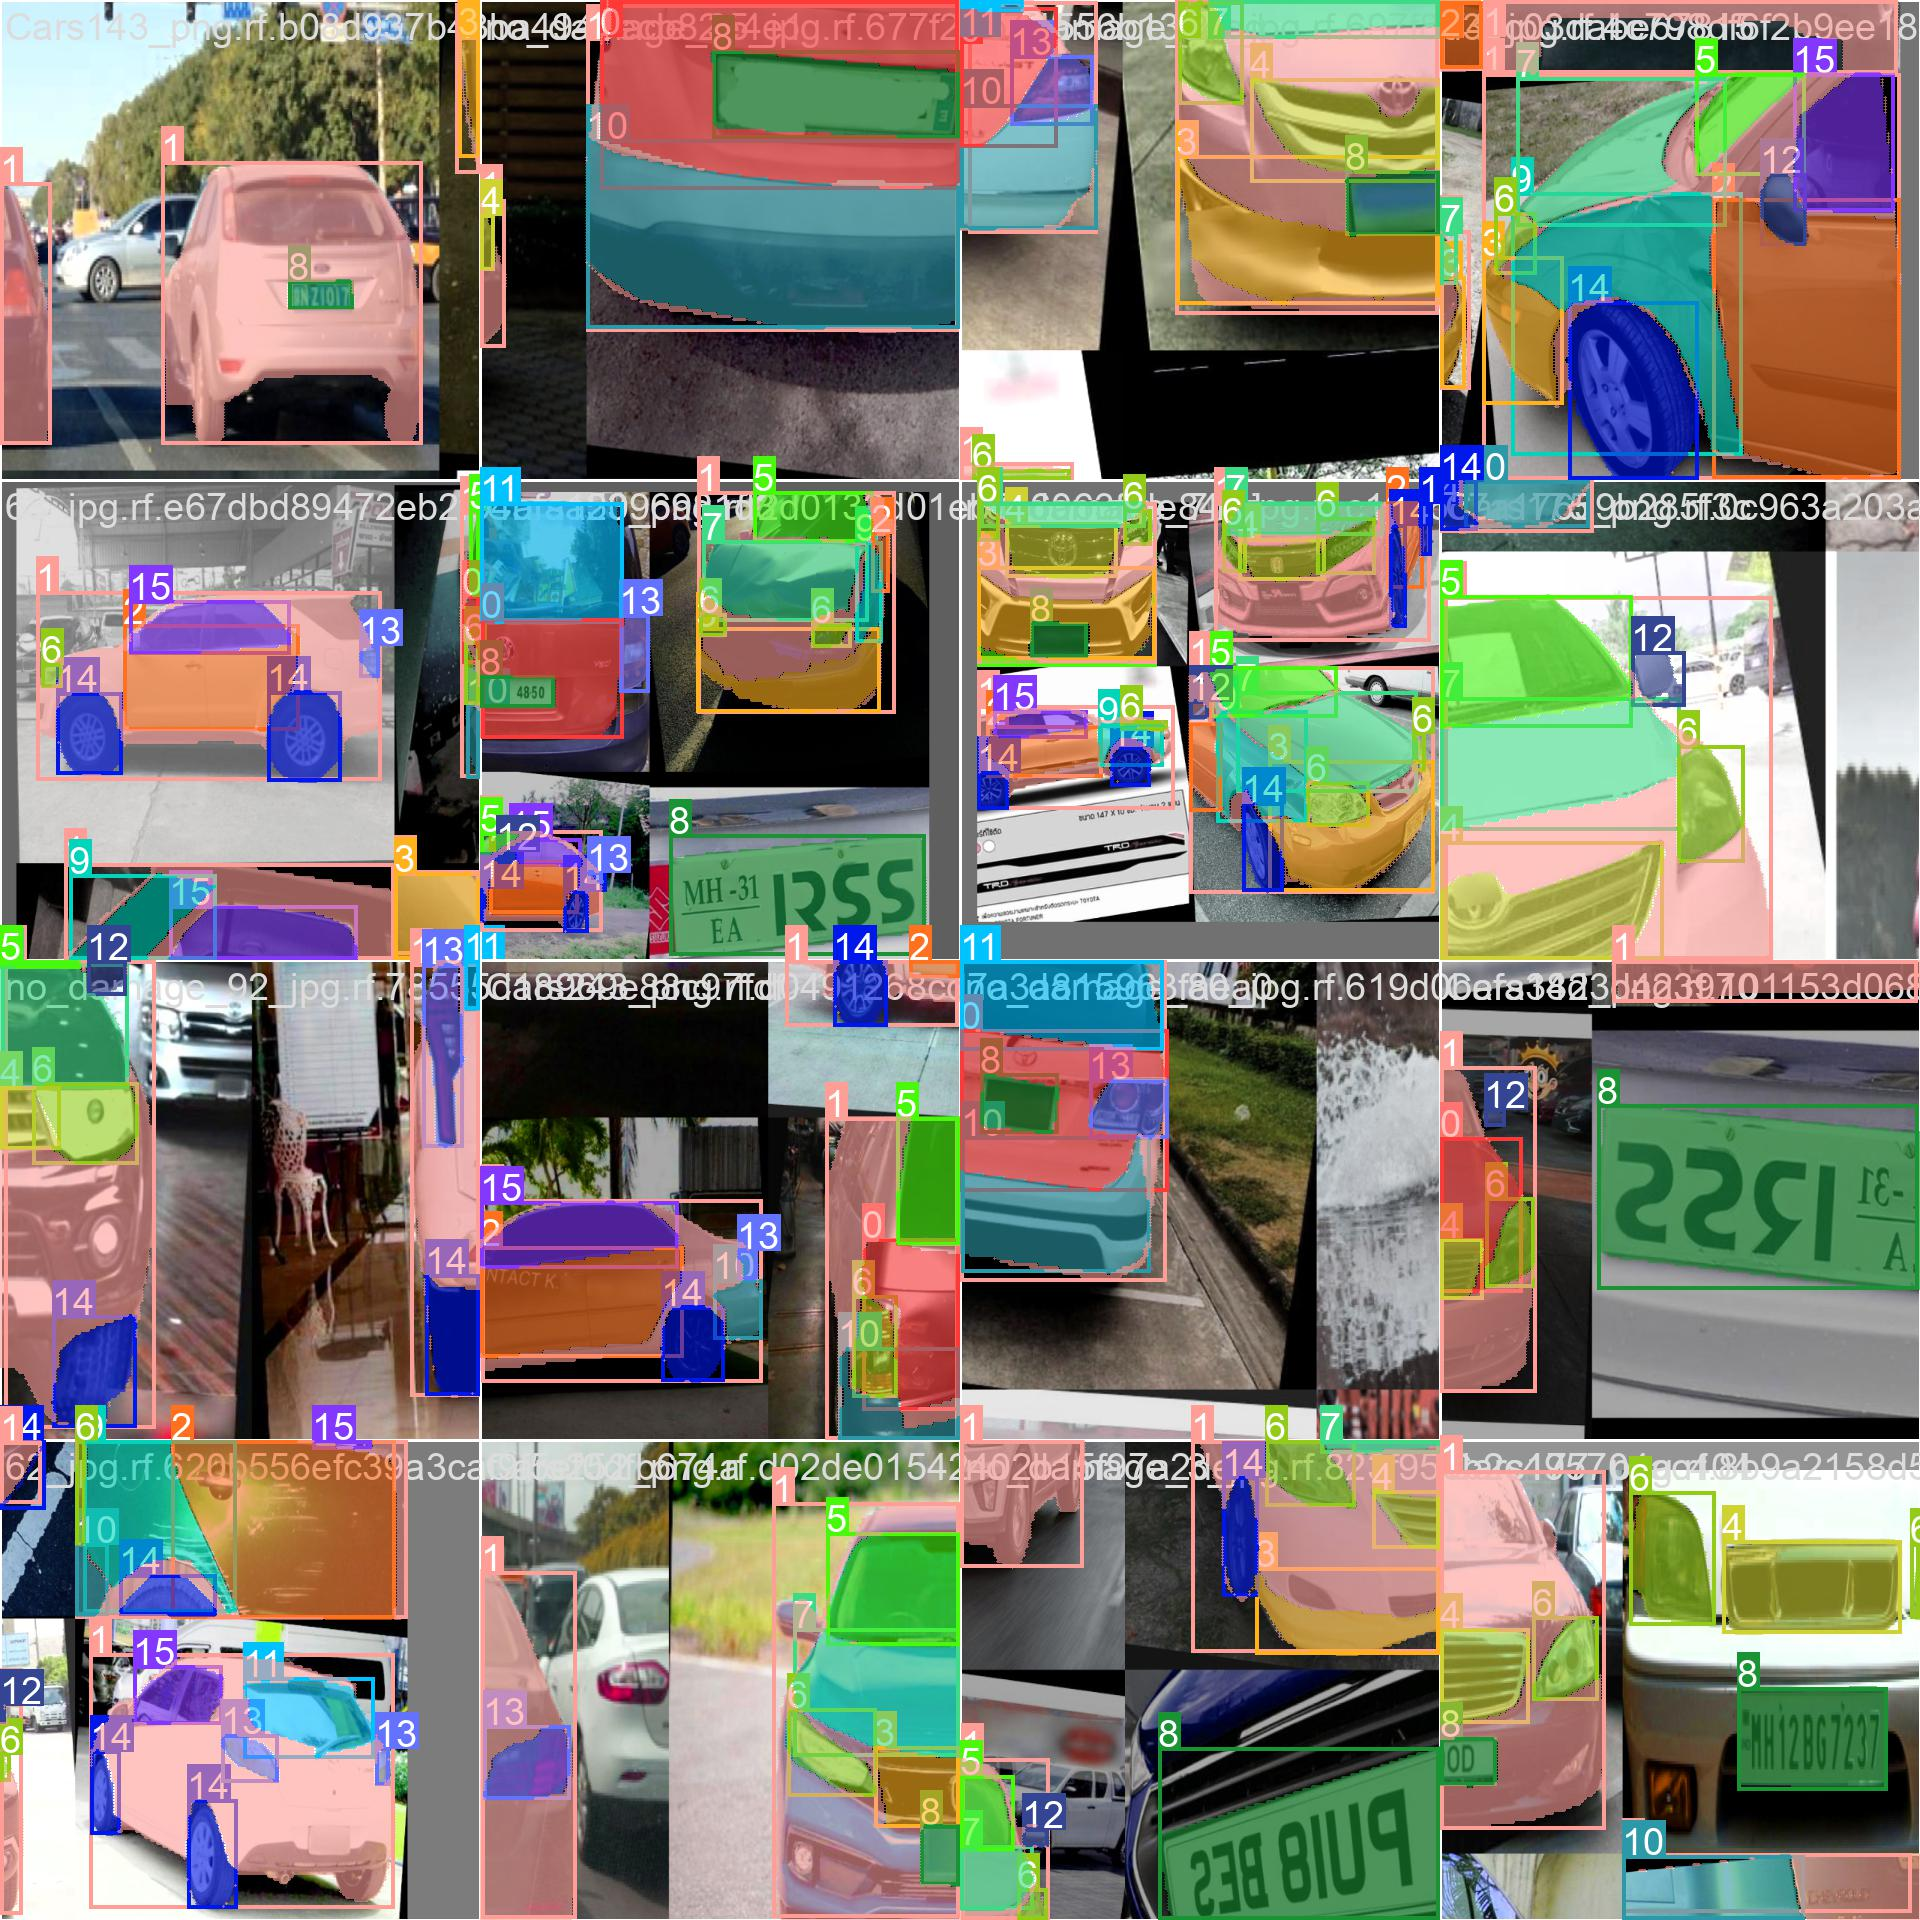

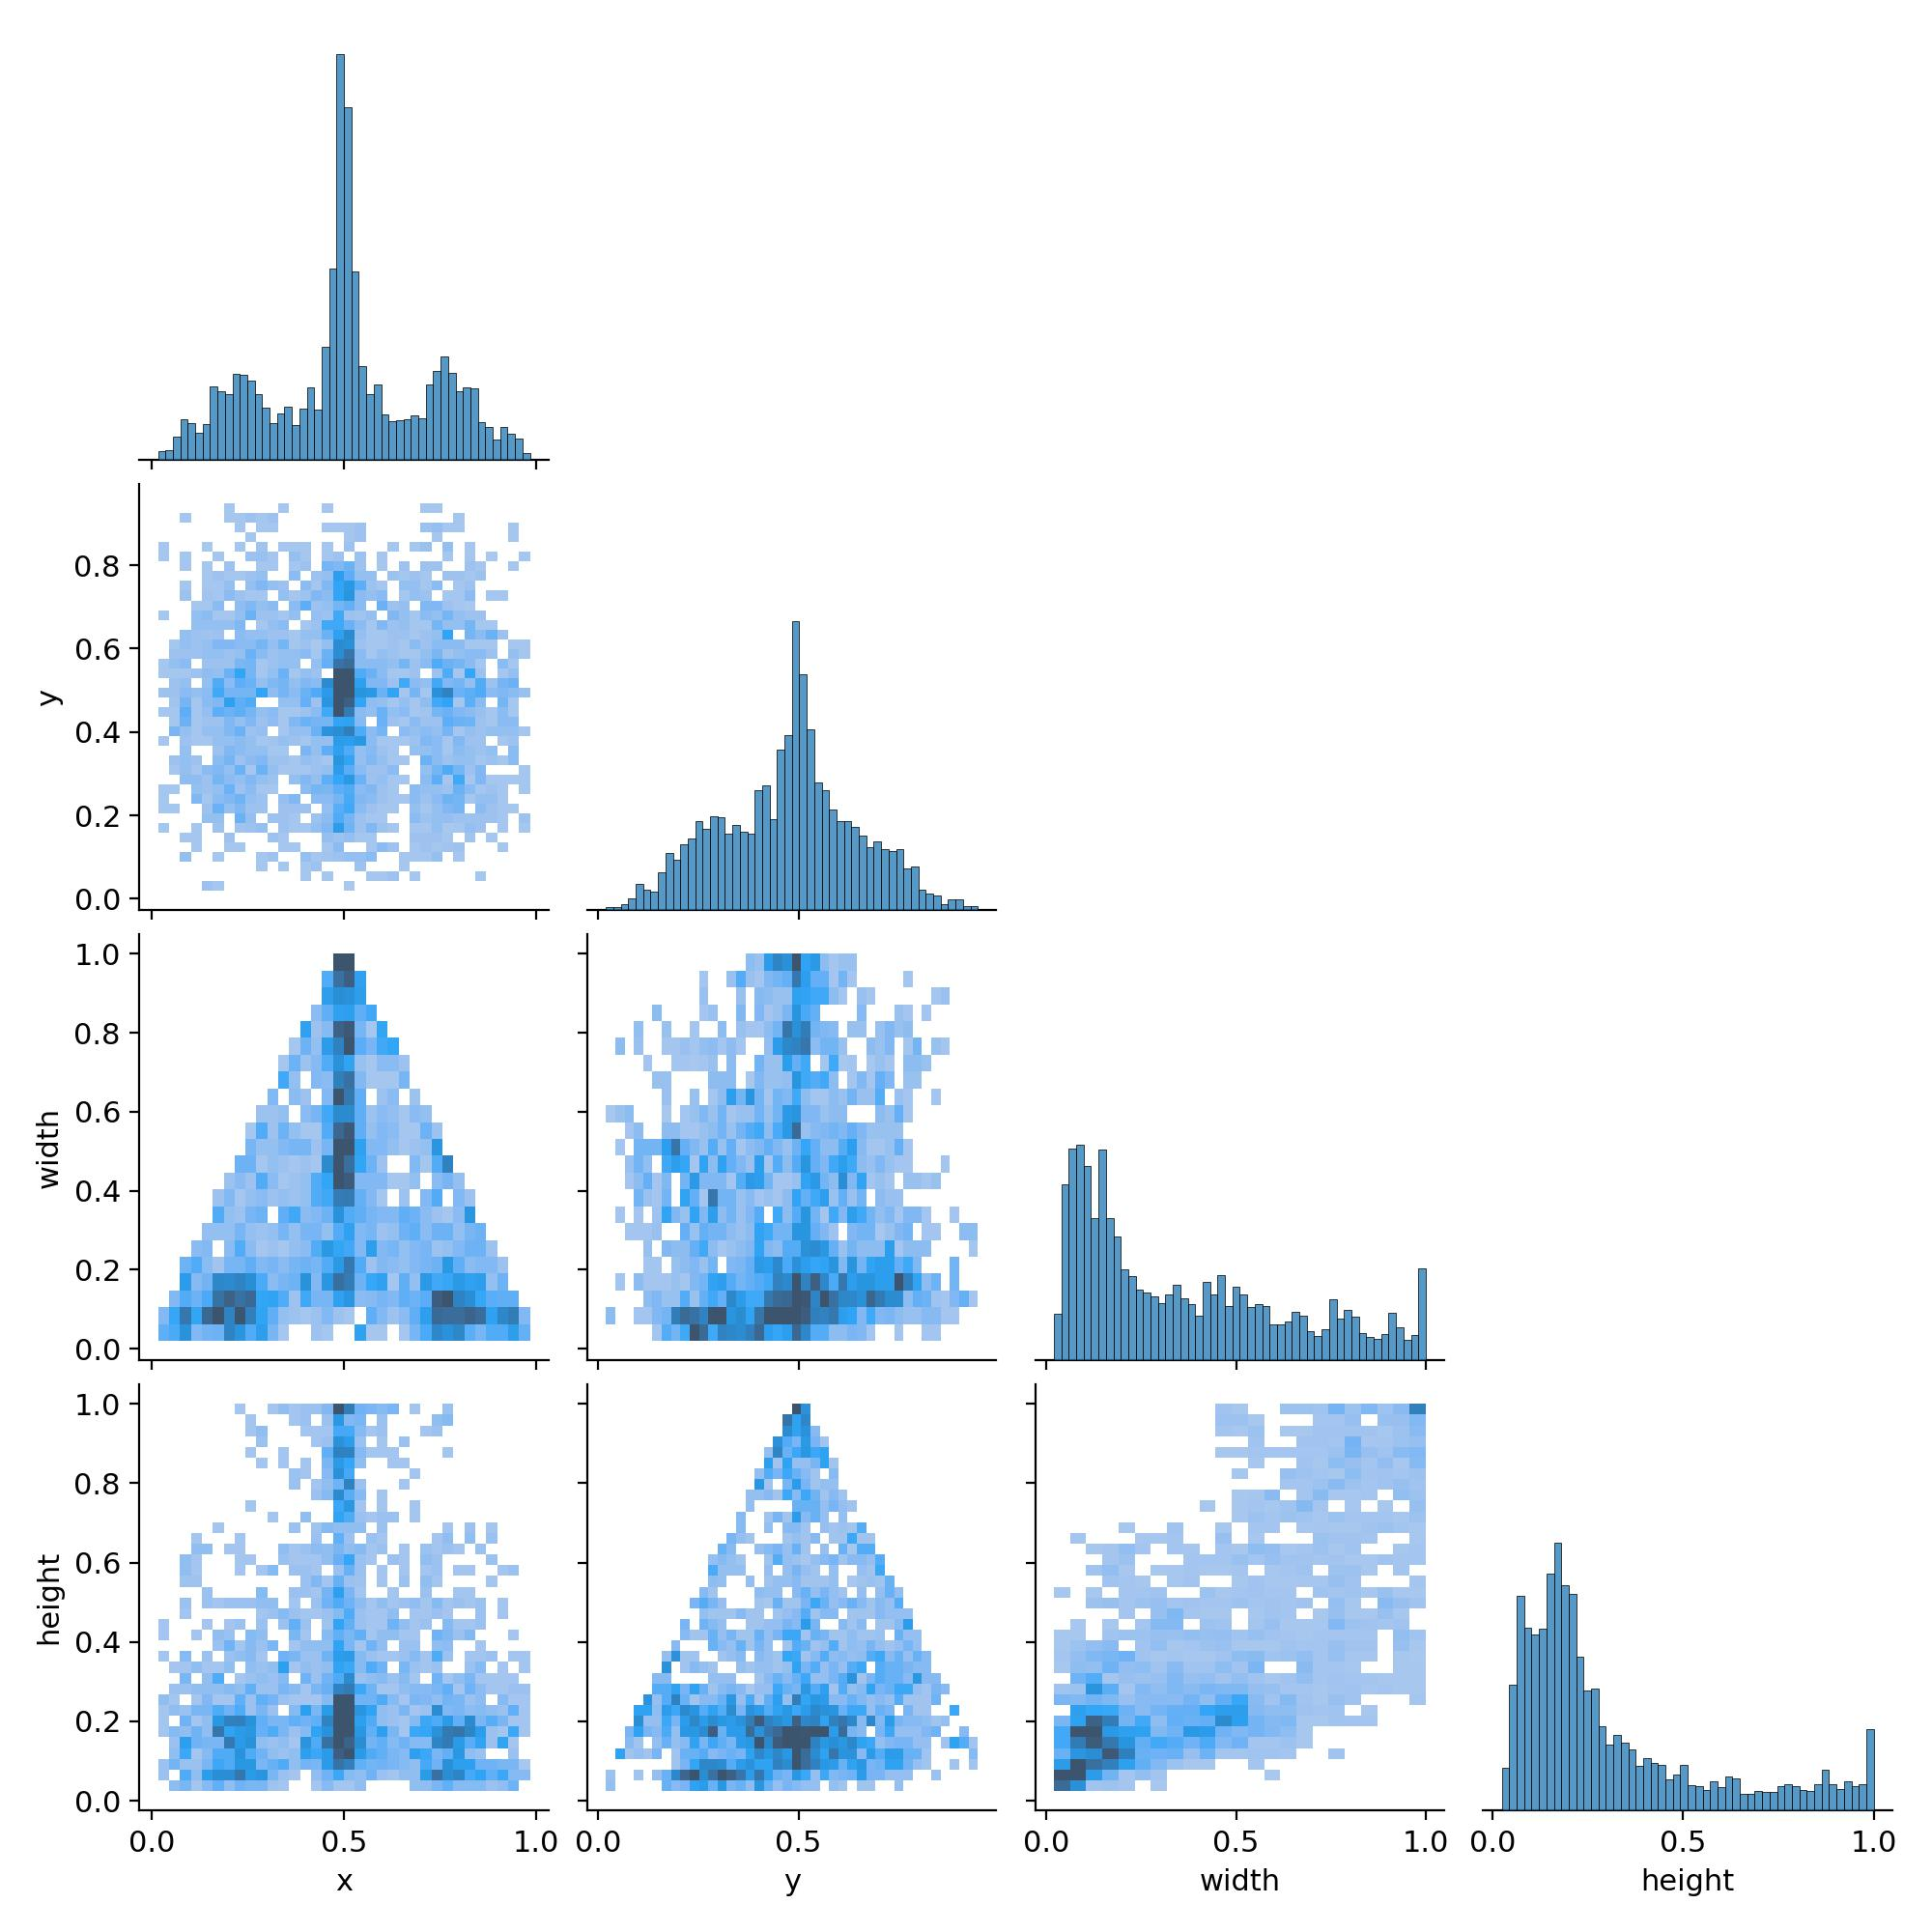

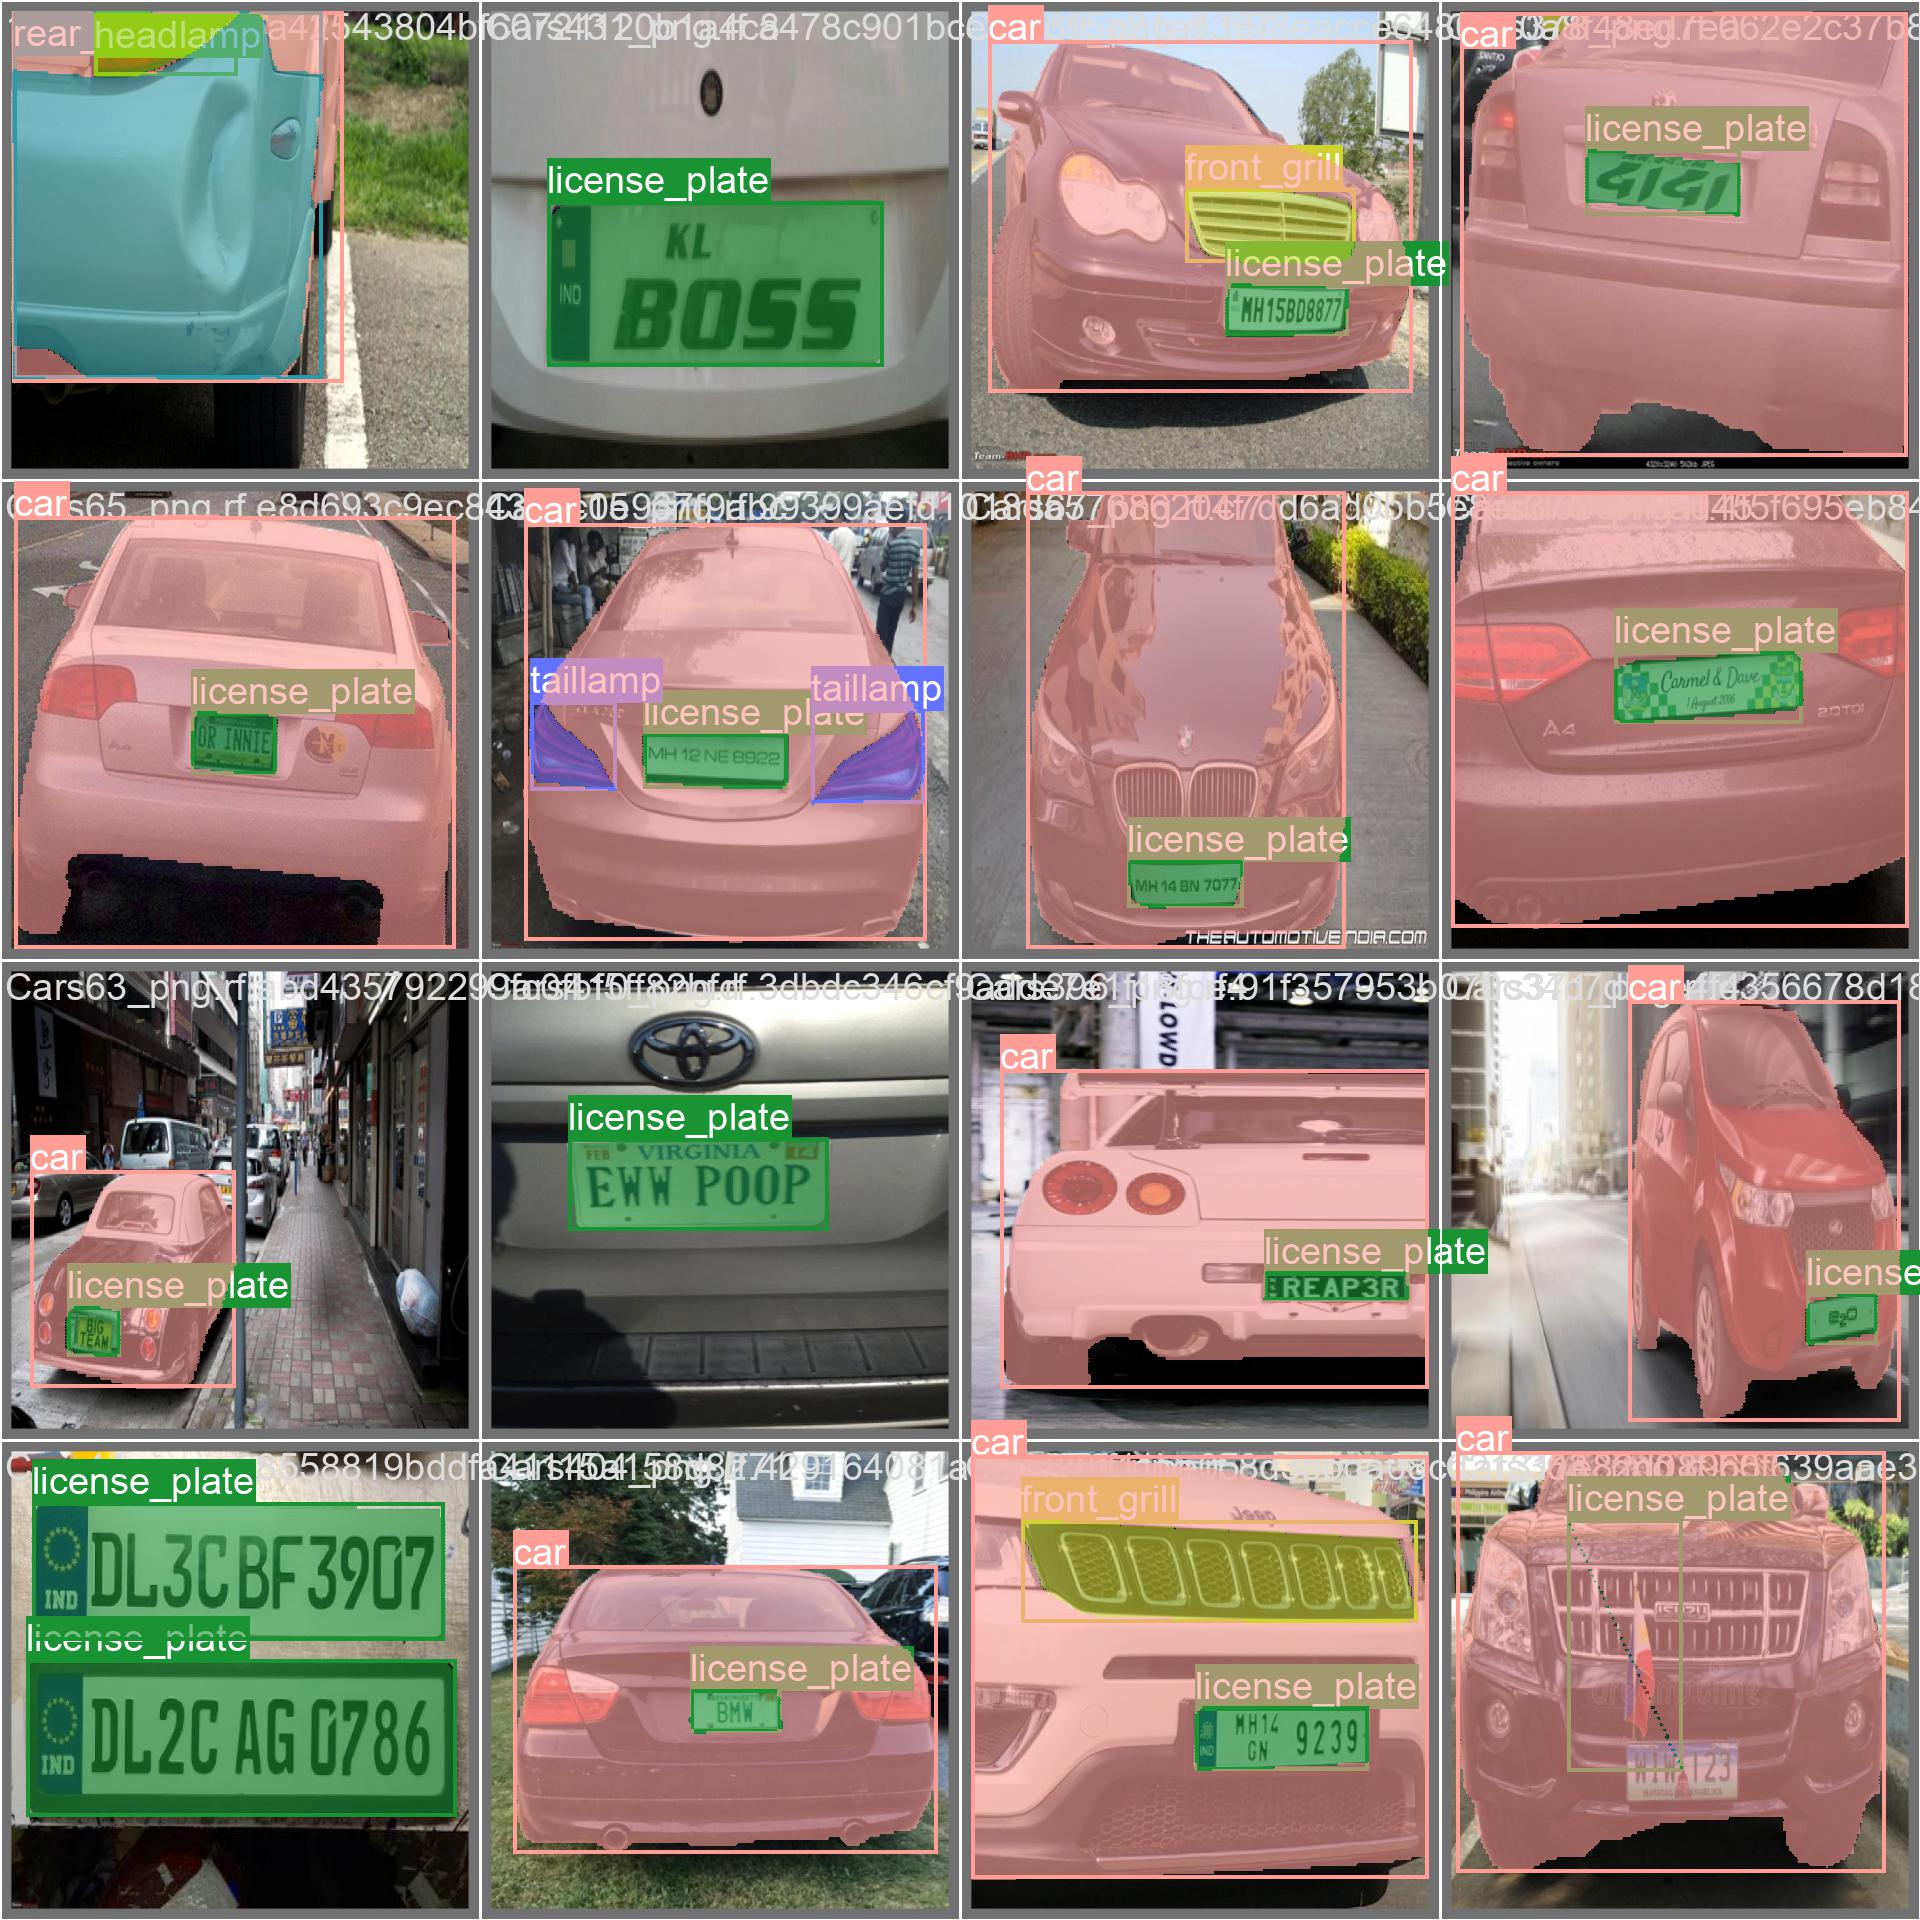

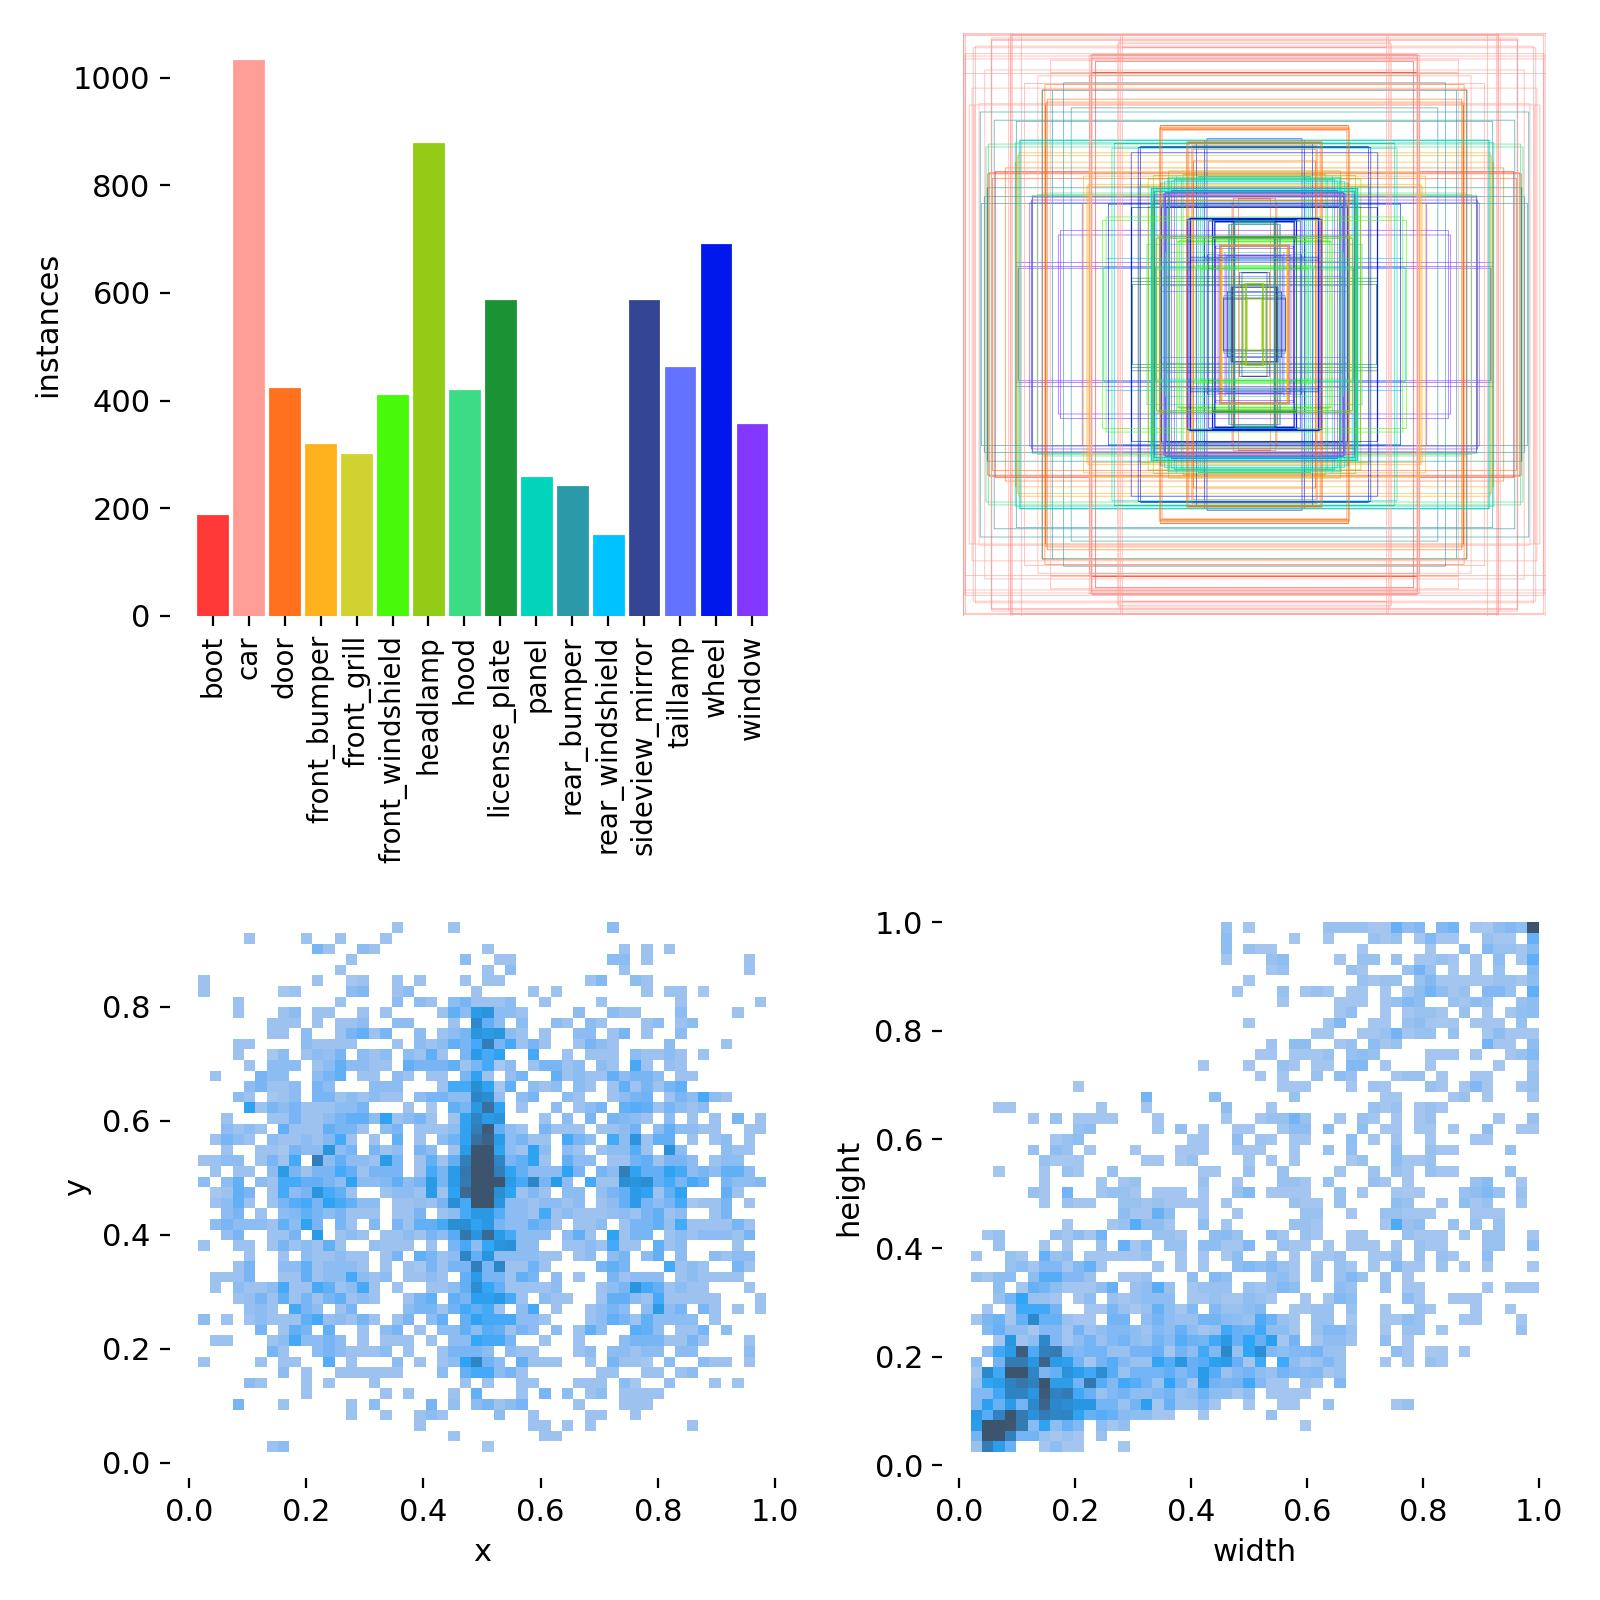

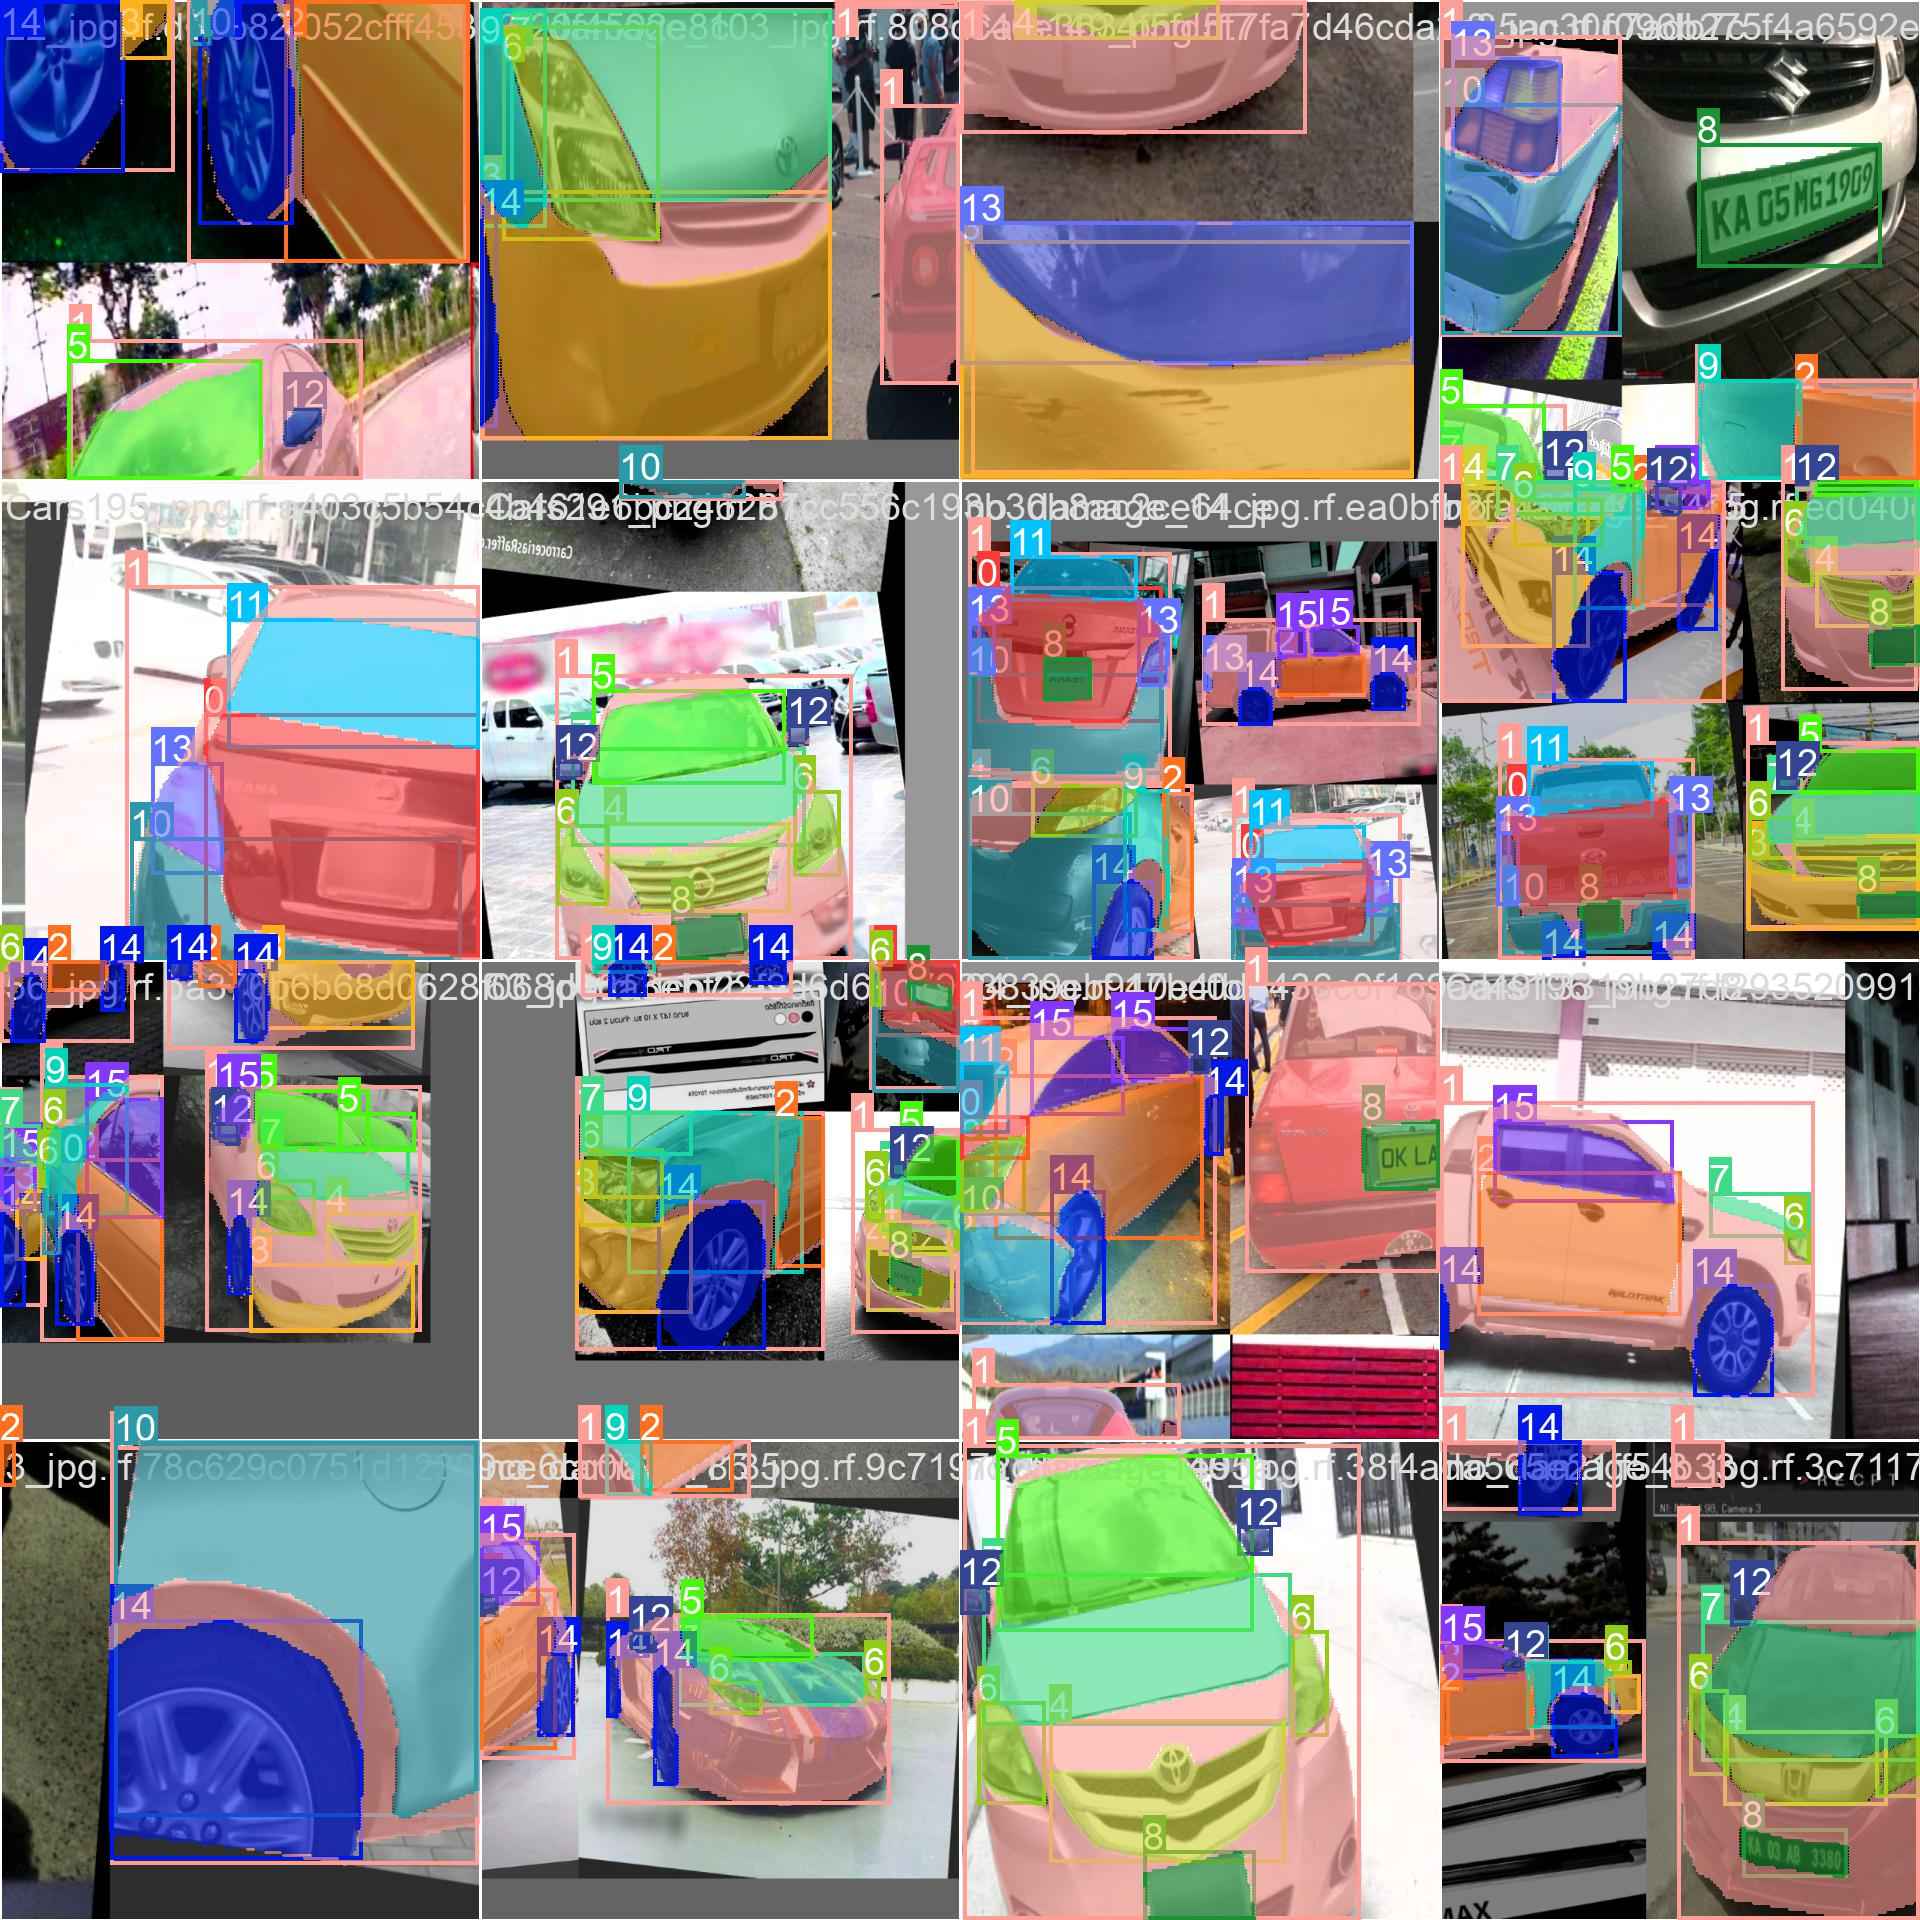

In [ ]:

for imageName in glob.glob(f'/content/{PROJECT_NAME}/{RUN_NAME}/*.jpg')[:5]:
      display(Image(filename=imageName))
      print("\n")

# 4. Export

Export a YOLOv8 model to any supported format with the `format` argument, i.e. `format=onnx`.

- 💡 ProTip: Export to [ONNX](https://onnx.ai/) or [OpenVINO](https://docs.openvino.ai/latest/index.html) for up to 3x CPU speedup.  
- 💡 ProTip: Export to [TensorRT](https://developer.nvidia.com/tensorrt) for up to 5x GPU speedup.


| Format                                                                     | `format=`          | Model                     |
|----------------------------------------------------------------------------|--------------------|---------------------------|
| [PyTorch](https://pytorch.org/)                                            | -                  | `yolov8n.pt`              |
| [TorchScript](https://pytorch.org/docs/stable/jit.html)                    | `torchscript`      | `yolov8n.torchscript`     |
| [ONNX](https://onnx.ai/)                                                   | `onnx`             | `yolov8n.onnx`            |
| [OpenVINO](https://docs.openvino.ai/latest/index.html)                     | `openvino`         | `yolov8n_openvino_model/` |
| [TensorRT](https://developer.nvidia.com/tensorrt)                          | `engine`           | `yolov8n.engine`          |
| [CoreML](https://github.com/apple/coremltools)                             | `coreml`           | `yolov8n.mlmodel`         |
| [TensorFlow SavedModel](https://www.tensorflow.org/guide/saved_model)      | `saved_model`      | `yolov8n_saved_model/`    |
| [TensorFlow GraphDef](https://www.tensorflow.org/api_docs/python/tf/Graph) | `pb`               | `yolov8n.pb`              |
| [TensorFlow Lite](https://www.tensorflow.org/lite)                         | `tflite`           | `yolov8n.tflite`          |
| [TensorFlow Edge TPU](https://coral.ai/docs/edgetpu/models-intro/)         | `edgetpu`          | `yolov8n_edgetpu.tflite`  |
| [TensorFlow.js](https://www.tensorflow.org/js)                             | `tfjs`             | `yolov8n_web_model/`      |
| [PaddlePaddle](https://github.com/PaddlePaddle)                            | `paddle`           | `yolov8n_paddle_model/`   |



In [ ]:
!yolo export model=$BEST_WEIGHTS_PATH format=onnx

Ultralytics YOLOv8.0.75 🚀 Python-3.9.16 torch-2.0.0+cu118 CPU
YOLOv8l-seg summary (fused): 295 layers, 45924224 parameters, 0 gradients, 220.2 GFLOPs

PyTorch: starting from /content/yolov8_body_parts/train_seg_50_epoch/weights/best.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 52, 8400), (1, 32, 160, 160)) (88.0 MB)
requirements: YOLOv8 requirement "onnx>=1.12.0" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 60.6 MB/s eta 0:00:00

requirements: 1 package updated per ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.13.1 opset 17...
============= Diagnostic Run torch.onnx.export version 2.0.0+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

ONNX: expo

In [ ]:
#Close clearML experiment
task.close()